# AN Plots
This notebook is used to collect some of the code used to produce the plots particularly for the analysis note AN-22-133.

In [1]:
import os
import glob
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import hist
import mplhep as hep
import warnings
from plot_utils import *
import fill_utils

warnings.filterwarnings('ignore')
hep.style.use("CMS")
plt.style.use(hep.style.CMS)
matplotlib.rcParams.update({'figure.max_open_warning': 0})
plt.rcParams['figure.dpi'] = 70

matplotlib.rcParams['figure.facecolor'] = 'white'



## Notebook Parameters
The following couple cells define the input and output directories, and load in the desired .pkl files into the `plots` nested dictionary.<br>
`output_label`: _str_, saves plots as `<output_label>+<plot_name>.<file_ext>`.<br>
`file_ext`: _str_, see above.<br>

In [2]:
# parameters
AN_label = '{}.pdf'
saveToAN = False  # control whether to save to AN directory

The `plots` dictionary is used to store all the plots imported from the pickle files. Dimensions: (sample) x (plot label) <br>
The `loader` function in `plot_utils.py` automatically merges all the QCD HT and QCD pT bins into one sample ('QCD_HT' and 'QCD_Pt'), applies the lumis, and excludes some of the low QCD bins.<br>

In [3]:
# This part is meant to be flxeible, depending on what you want to import
# dimensions: (sample) x (plot label)

# input .pkl files
plotDir = '/data/submit/{}/SUEP/outputs/'.format(os.environ['USER'])
#plotDir = '../testplot/'
infile_names = glob.glob(plotDir+'*')

# scouting_files_2016 = getHistLists(plotDir, 'IronMan6qcd', '../filelist/Scout/list_2016_scout_MC.txt')
# scouting_files_2016

# scouting_files_2016 = getHistLists(plotDir, 'IronMan2016MC', '../filelist/Scout/list_2016_scout_MC.txt')
# scouting_files_2016

# scouting_files_2016 = getHistLists(plotDir, 'afterHLTfix16_noHTcut', '../filelist/Scout/list_2016_scout_MC.txt')
# scouting_files_2016

# scouting_files_2016 = getHistLists(plotDir, 'afterHLTfix16_noHTcut2', '../filelist/Scout/list_2016_scout_MC.txt')
# scouting_files_2016

# scouting_files_2016 = getHistLists(plotDir, 'afterHLTfix16_noHTcut4', '../filelist/Scout/list_2016_scout_MC.txt')
# scouting_files_2016

# scouting_files_2016 = getHistLists(plotDir, 'afterHLTfix16_HTcut2', '../filelist/Scout/list_2016_scout_MC.txt')
# scouting_files_2016

#scouting_data_2017 = ['/data/submit/akanugan/SUEP/outputs/GluGluToSUEP_HT400_T0p25_mS600.000_mPhi1.000_T0.250_modeleptonic_TuneCP5_13TeV_IronMan4.root']


# scouting_data_2016 = getHistLists(plotDir, 'full16tes', '../filelist/Scout/list_2016_scout_data.txt')
# scouting_data_2016

# scouting_files_2017 = getHistLists(plotDir, 'IronMan4qcd', '../filelist/Scout/list_2017_scout_MC.txt')
# scouting_files_2017

# scouting_files_2017 = getHistLists(plotDir, 'new3', '../filelist/Scout/list_2017_scout_MC.txt')
# scouting_files_2017

# scouting_files_2017 = getHistLists(plotDir, 'afterHLTfix17_noHTcut4', '../filelist/Scout/list_2017_scout_MC.txt')
# scouting_files_2017

scouting_files_2017 = getHistLists(plotDir, 'afterHLTfix17_HTcut2', '../filelist/Scout/list_2017_scout_MC.txt')
scouting_files_2017

scouting_data_2017 = getHistLists(plotDir, 'full17tes', '../filelist/Scout/list_2017_scout_data.txt')
scouting_data_2017

scouting_files_2018 = getHistLists('/data/submit/jinw65/SUEP/outputs/', 'Nov8_woHTcut', '../filelist/Scout/list_2018_scout_MC.txt')



# generate list of files that you want to merge histograms for
# offline_files_2018 = getHistLists(plotDir, 'unblind', '../filelist/list_2018_JetHT_A02.txt')
# offline_files_2017 = getHistLists(plotDir, 'unblind', '../filelist/list_2017_JetHT_A02.txt')
# offline_files_2016 = getHistLists(plotDir, 'unblind', '../filelist/list_2016_JetHT_A02.txt')

# offline_files_2018 = getHistLists(plotDir, 'March2023', '../filelist/list_2018_MC_A01.txt')
#offline_files_2017 = getHistLists(plotDir, 'March2023', '../filelist/list_2017_MCBkg_A01.txt')
# offline_files_2016 = getHistLists(plotDir, 'March2023', '../filelist/list_2016_MC_A01.txt')

#offline_files_SUEP_2018 = getHistLists(plotDir, 'March2023', '../filelist/list_noHighMS_signal_offile.txt')
#offline_files_SUEP_2017 = getHistLists(plotDir, 'July2023_2017_superlite', '../filelist/list_noHighMS_signal_offline.txt')
#offline_files_SUEP_2016 = getHistLists(plotDir, 'July2023_2016_superlite', '../filelist/list_2016_MC_A01.txt')
#offline_files_SUEP_2016apv = getHistLists(plotDir, 'July2023_2016apv', '../filelist/list_2016_MC_A01.txt')

# playing with only some samples
#offline_files_SUEP_2018 = [x for x in offline_files_SUEP_2018 if 'generic' in x and ('mS125' in x or 'mS200' in x or 'mS300' in x)]
#offline_files_SUEP_2017 = [x for x in offline_files_SUEP_2017 if 'generic' in x and ('mS125' in x or 'mS200' in x or 'mS300' in x)]
#offline_files_SUEP_2016 = [x for x in offline_files_SUEP_2016 if 'generic' in x and ('mS125' in x or 'mS200' in x or 'mS300' in x)]
#offline_files_SUEP_2016apv = [x for x in offline_files_SUEP_2016apv if 'generic' in x and ('mS125' in x or 'mS200' in x or 'mS300' in x)]

#scouting_files_2018_bg = getHistLists(plotDir, 'Sep22', '/work/submit/jinw65/SUEPCoffea_dask/filelist/list_2018_scout_MC_tmp.txt')
#scouting_files_2018_bg = getHistLists(plotDir, 'Sep22', '/work/submit/jinw65/SUEPCoffea_dask/filelist/list_2018_scout_MC_tmp.txt')
#scouting_files_2018_data = getHistLists(plotDir, 'Sep28_HTJECcut', '/work/submit/jinw65/SUEPCoffea_dask/filelist/list_2018_scout_data.txt')
#scouting_files_2018_signal = getHistLists(plotDir, 'Oct03_2', '/work/submit/jinw65/SUEPCoffea_dask/filelist/list_noHighMS_signal_scout_test.txt')
#scouting_files_2016apv_signal = getHistLists(plotDir, 'Nov9_HTcut', '../filelist/Scout/list_noHighMS_signal_scout_test.txt')
#scouting_files_2018_data = getHistLists(plotDir, 'Sep28_HTJECcut', '../filelist/Scout/list_2018_scout_data.txt')
#scouting_files_2018_bg = getHistLists(plotDir, 'Nov12_noHTcut_rebin', '../filelist/Scout/list_2018_scout_MC_tmp.txt')
#scouting_files_2018_bg = getHistLists(plotDir, 'Nov8_woHTcut', '../filelist/Scout/list_2018_scout_MC_tmp.txt')
#scouting_files_2017_data = getHistLists(plotDir, 'full17tes', '../filelist/Scout/list_2017_scout_data.txt')
#scouting_files_2017_bg = getHistLists(plotDir, 'new3', '../filelist/Scout/list_2017_scout_MC.txt')

In [4]:
#scouting_files_2016_bg

In [4]:
# merge the histograms, apply lumis, exclude low HT bins
#plots_SUEP_2018 = loader(offline_files_SUEP_2018, year='2018', exclude_low_bins=True)
#plots_SUEP_2017 = loader(offline_files_SUEP_2017, year='2017', exclude_low_bins=True)
#plots_SUEP_2016 = loader(offline_files_SUEP_2016, year='2016', exclude_low_bins=True)
#plots_SUEP_2016apv = loader(offline_files_SUEP_2016apv, year='2016_apv', exclude_low_bins=True)

#plots_2018 = loader(offline_files_2018, auto_lumi=True, exclude_low_bins=True)
#plots_2017 = loader(offline_files_2017, auto_lumi=True, exclude_low_bins=True)
#plots_2016 = loader(offline_files_2016, auto_lumi=True, exclude_low_bins=True)


#plots_scouting_2016_bg = loader(scouting_files_2016,auto_lumi=1, exclude_low_bins=False, scouting=True)
# plots_scouting_2016_data = loader(scouting_data_2016,auto_lumi=1, exclude_low_bins=True, scouting=True)

plots_scouting_2017_bg = loader(scouting_files_2017,auto_lumi=1, exclude_low_bins=False, scouting=True)
plots_scouting_2017_data = loader(scouting_data_2017,auto_lumi=1, exclude_low_bins=True, scouting=True)

#plots_scouting_2018_bg = loader(scouting_files_2018,auto_lumi=1, exclude_low_bins=False, scouting=True)


#plots_scouting_2018_bg = loader(scouting_files_2018_bg,auto_lumi=True, exclude_low_bins=True,scouting=True)
#plots_scouting_2018_bg = loader(scouting_files_2018_bg,auto_lumi=True, exclude_low_bins=True,scouting=True)
#plots_scouting_2018_data = loader(scouting_files_2018_data,auto_lumi=True, exclude_low_bins=False,scouting=True)
#plots_scouting_2018_signal = loader(scouting_files_2018_signal,year='2018', exclude_low_bins=False,scouting=True)
#plots_scouting_2016apv_signal = loader(scouting_files_2016apv_signal,year='2016_apv', exclude_low_bins=False,scouting=True)

#plots_scouting_2017_bg = loader(scouting_files_2017_bg,auto_lumi=True, exclude_low_bins=True,scouting=True)
#plots_scouting_2017_data = loader(scouting_files_2017_data,auto_lumi=True, exclude_low_bins=False,scouting=True)
#plots_scouting_2016apv_data = loader(scouting_files_2016apv_data,auto_lumi=True, exclude_low_bins=True,scouting=True)
#plots_scouting_2016apv_bg = loader(scouting_files_2016apv_bg,auto_lumi=True, exclude_low_bins=True,scouting=True)

In [6]:
# put everything in one dictionary
plots = {}

def applyNormalizationToSUEPSamples(files, plots_SUEP):   
    output = {}
    for file, sample in zip(files, plots_SUEP.keys()):
        file = file.split("/")[-1].split("13TeV")[0]+'13TeV-pythia8'
        xsection = fill_utils.getXSection(file, '2018_SUEP')
        output[sample] = fill_utils.apply_normalization(plots_SUEP[sample], xsection)
    return output
    

# apply xsection and filter efficiency to SUEP here
#plots_SUEP_2018 = applyNormalizationToSUEPSamples(offline_files_SUEP_2018, plots_SUEP_2018)
#plots_SUEP_2017 = applyNormalizationToSUEPSamples(offline_files_SUEP_2017, plots_SUEP_2017)
#plots_SUEP_2016 = applyNormalizationToSUEPSamples(ofline_files_SUEP_2016, plots_SUEP_2016)
#plots_SUEP_2016apv = applyNormalizationToSUEPSamples(offline_files_SUEP_2016apv, plots_SUEP_2016apv)

#for key in plots_SUEP_2018.keys(): plots[key+"_2018"] = plots_SUEP_2018[key]
#for key in plots_SUEP_2017.keys(): plots[key+"_2017"] = plots_SUEP_2017[key]
# for key in plots_SUEP_2016.keys(): 
#     plots[key+"_2016"] = {}
#     if key not in plots_SUEP_2016apv.keys(): continue
#     for plot in plots_SUEP_2016[key].keys():
#         plots[key+"_2016"][plot] = plots_SUEP_2016[key][plot].copy() + plots_SUEP_2016apv[key][plot].copy()
#for key in plots_scouting_2018_bg.keys(): plots[key+"_2018"] = plots_scouting_2018_bg[key]
#for key in plots_scouting_2018_data.keys(): plots[key+"_2018"] = plots_scouting_2018_data[key]
#for key in plots_scouting_2018_data.keys(): plots[key+"_2018"] = plots_scouting_2018_data[key]
#for key in plots_scouting_2018_bg.keys(): plots[key+"_2018"] = plots_scouting_2018_bg[key]
for key in plots_scouting_2017_data.keys(): plots[key+"_2017"] = plots_scouting_2017_data[key]
for key in plots_scouting_2017_bg.keys(): plots[key+"_2017"] = plots_scouting_2017_bg[key]
#for key in plots_scouting_2016_bg.keys(): plots[key+"_2017"] = plots_scouting_2016_bg[key]
#for key in plots_scouting_2018_signal.keys(): plots[key+"_2018"] = plots_scouting_2018_signal[key]
#for key in plots_scouting_2016apv_signal.keys(): plots[key+"_2016apv"] = plots_scouting_2016apv_signal[key]
#for key in plots_2017.keys(): plots[key+"_2017"] = plots_2017[key]
#for key in plots_2016.keys(): plots[key+"_2016"] = plots_2016[key]

In [7]:
plots.keys()


dict_keys(['data_C-v1+RAW_full17tes.root_2017', 'data_2017', 'data_D-v1+RAW_full17tes.root_2017', 'data_E-v1+RAW_full17tes.root_2017', 'data_F-v1+RAW_full17tes.root_2017', '1000to1500_2017', 'QCD_HT_2017', '100to200_2017', '1500to2000_2017', '2000toInf_2017', '200to300_2017', '300to500_2017', '500to700_2017', '50to100_2017', '700to1000_2017', 'TTJets_2017'])

In [9]:
#for year in [2017]: combineMCSamples(plots, year, ['QCD_HT'])
for year in [2017]: combineMCSamples(plots, year, ['QCD_HT','TTJets'])
#combineYears(plots, 'MC', ['2018'])
#combineYears(plots, 'data', ['2018'])
#for key in plots_scouting_2018_signal.keys(): combineYears(plots, key, ['2018'])
#combineYears(plots, 'data', ['2016apv'])
#for year in ["2016apv"]: combineMCSamples(plots, year, ['QCD_HT','TTJets'])
#combineYears(plots, 'MC', ['2016apv'])

These are all the samples loaded.

In [10]:
keys = list(plots.keys())
keys.sort()
for k in keys: print(k)

1000to1500_2017
100to200_2017
1500to2000_2017
2000toInf_2017
200to300_2017
300to500_2017
500to700_2017
50to100_2017
700to1000_2017
MC_2017
QCD_HT_2017
TTJets_2017
data_2017
data_C-v1+RAW_full17tes.root_2017
data_D-v1+RAW_full17tes.root_2017
data_E-v1+RAW_full17tes.root_2017
data_F-v1+RAW_full17tes.root_2017


In [83]:
#plots['data_2018']

## Ch. 4 Event Selection

In [57]:
##plots['mS125_T4.0_mPhi2.0_generic_2016'].keys()

In [58]:
#print(lumiLabel("2016apv",scouting=True))

### 1D Comparison - HT

data_2017


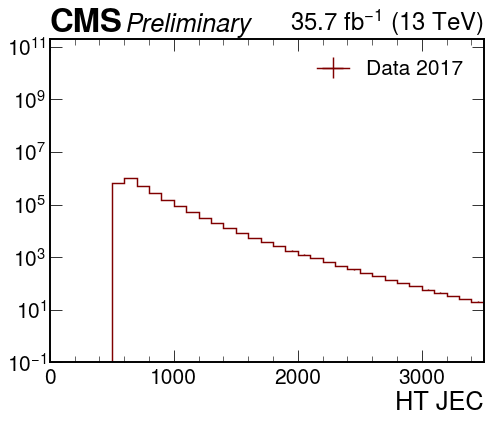

In [12]:
plt.rcParams['figure.figsize'] = [8, 6]
plot_label = 'ht_JEC_Cluster'
year = '2017'
output_label="Nov12_noHTcut_rebin_lowHTremove200to300"
file_ext=".png"
temp = '4.0'
mPhi = '2.0'
decay = 'generic'
#samples = ['TTJets_'+year, 'QCD_HT_'+year]
samples = ['data_'+year]
#'mS125_T'+temp+'_mPhi'+mPhi+'_'+decay+'_'+year,
#            'mS400_T'+temp+'_mPhi'+mPhi+'_'+decay+'_'+year,
#           'mS700_T'+temp+'_mPhi'+mPhi+'_'+decay+'_'+year,
#            'mS1000_T'+temp+'_mPhi'+mPhi+'_'+decay+'_'+year]
labels = ['Data 2017']
#          r'$m_{S}=125$ GeV',r'$m_{S}=400$ GeV',r'$m_{S}=700$ GeV',r'$m_{S}=1000$ GeV']
density = False

hep.cms.label(llabel='Preliminary', data=False, lumi=lumiLabel(year,scouting=True))
hBkg, hSignal, cSignal = [], [], []
lBkg, lSignal, cBkg = [], [], []
for label, sample in zip(labels, samples):
    if sample not in plots.keys(): continue
    print(sample)
    #h = plots[sample][plot_label][::2j]
    h = plots[sample][plot_label][::]
    if density:
        h = h/h.sum().value
    if 'mS' in sample: 
        hSignal.append(h)
        lSignal.append(label)
        cSignal.append(getColor(sample))
    else: 
        #hBkg.append(rebin_piecewise(h,np.arange(0,3500,50)))
        hBkg.append(h/100)
        lBkg.append(label)
        cBkg.append(getColor(sample))
    
hep.histplot(hBkg, yerr=True, label=lBkg, color=cBkg, histtype='step', alpha=1, stack=True) 
#hep.histplot(hSignal, yerr=True, label=lSignal, color=cSignal, stack=False) 

# tweak these by hand, as needed
plt.ylim(0.1,2e11)
plt.xlim(0,3500)
plt.legend(loc='best')
plt.yscale("log")

# save and show
#if saveToAN: plt.savefig(AN_label.format("HT_"+year))
plt.savefig(output_label+plot_label+"_"+year+file_ext,transparent=True)
# plt.show()

In [42]:
h

Hist(Regular(100, 0, 7000, name='xaxis', label='HT JEC'), storage=Weight()) # Sum: WeightedSum(value=4.55651e+08, variance=1.48928e+10) (WeightedSum(value=4.55651e+08, variance=1.48928e+10) with flow)

In [94]:
h.axes.edges

(array([    0.,   100.,   200.,   300.,   400.,   500.,   600.,   700.,
          800.,   900.,  1000.,  1100.,  1200.,  1300.,  1400.,  1500.,
         1600.,  1700.,  1800.,  1900.,  2000.,  2100.,  2200.,  2300.,
         2400.,  2500.,  2600.,  2700.,  2800.,  2900.,  3000.,  3100.,
         3200.,  3300.,  3400.,  3500.,  3600.,  3700.,  3800.,  3900.,
         4000.,  4100.,  4200.,  4300.,  4400.,  4500.,  4600.,  4700.,
         4800.,  4900.,  5000.,  5100.,  5200.,  5300.,  5400.,  5500.,
         5600.,  5700.,  5800.,  5900.,  6000.,  6100.,  6200.,  6300.,
         6400.,  6500.,  6600.,  6700.,  6800.,  6900.,  7000.,  7100.,
         7200.,  7300.,  7400.,  7500.,  7600.,  7700.,  7800.,  7900.,
         8000.,  8100.,  8200.,  8300.,  8400.,  8500.,  8600.,  8700.,
         8800.,  8900.,  9000.,  9100.,  9200.,  9300.,  9400.,  9500.,
         9600.,  9700.,  9800.,  9900., 10000.]),)

TTJets_2017
QCD_HT_2017


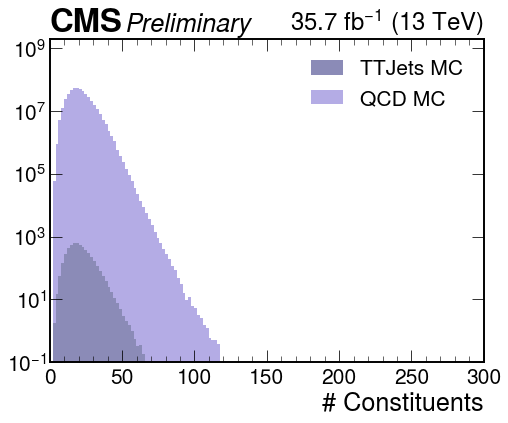

In [13]:
plot_label = 'SUEP_nconst_Cluster'
year = '2017'
output_label="Oct31_HTJECcut"
file_ext=".pdf"
temp = '4.0'
mPhi = '2.0'
decay = 'generic'
samples = ['TTJets_'+year, 'QCD_HT_'+year]
#'mS125_T'+temp+'_mPhi'+mPhi+'_'+decay+'_'+year,
#            'mS400_T'+temp+'_mPhi'+mPhi+'_'+decay+'_'+year,
#           'mS700_T'+temp+'_mPhi'+mPhi+'_'+decay+'_'+year,
#            'mS1000_T'+temp+'_mPhi'+mPhi+'_'+decay+'_'+year]
labels = ['TTJets MC', 'QCD MC']
#          r'$m_{S}=125$ GeV',r'$m_{S}=400$ GeV',r'$m_{S}=700$ GeV',r'$m_{S}=1000$ GeV']
density = False

hep.cms.label(llabel='Preliminary', data=False, lumi=lumiLabel(year,scouting=True))
hBkg, hSignal, cSignal = [], [], []
lBkg, lSignal, cBkg = [], [], []
hData, lData, cData = [], [], []
for label, sample in zip(labels, samples):
    if sample not in plots.keys(): continue
    print(sample)
    h = plots[sample][plot_label][::2j]
    if density:
        h = h/h.sum().value
    if 'mS' in sample: 
        hSignal.append(h)
        lSignal.append(label)
        cSignal.append(getColor(sample))
    elif 'data' in sample:
        hData.append(h)
        lData.append(label)
        cData.append(getColor(sample))
    else: 
        hBkg.append(h)
        lBkg.append(label)
        cBkg.append(getColor(sample))
    
hep.histplot(hBkg, yerr=True, label=lBkg, color=cBkg, histtype='fill', alpha=0.5, stack=True) 
#hep.histplot(hData, yerr=True, label=lData, color=cData, stack=False) 
#hep.histplot(hSignal, yerr=True, label=lSignal, color=cSignal, stack=False) 

# tweak these by hand, as needed
plt.ylim(1e-1,2e9)
plt.xlim(0,300)
plt.legend(loc='best')
plt.yscale("log")

# save and show
#if saveToAN: plt.savefig(AN_label.format("HT_"+year))
#plt.savefig(output_label+plot_label+"_"+year+file_ext)

50to100_2017
100to200_2017
200to300_2017
300to500_2017
500to700_2017
700to1000_2017
1000to1500_2017
1500to2000_2017
2000toInf_2017


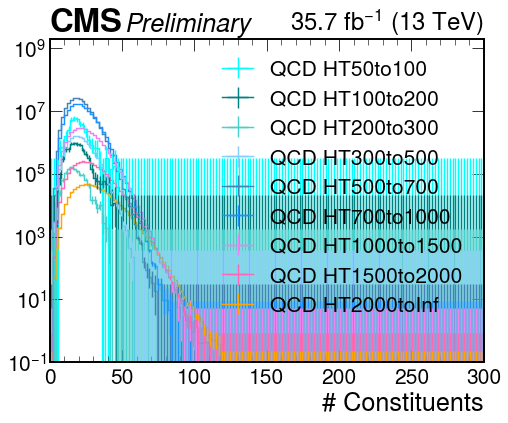

In [14]:
plot_label = 'SUEP_nconst_Cluster'
year = '2017'
output_label="Oct31_2_HTJECcut"
file_ext=".pdf"
temp = '4.0'
mPhi = '2.0'
decay = 'generic'
samples = ['50to100_'+year,'100to200_'+year,'200to300_'+year,'300to500_'+year,'500to700_'+year,'700to1000_'+year,'1000to1500_'+year,'1500to2000_'+year,'2000toInf_'+year]
#'mS125_T'+temp+'_mPhi'+mPhi+'_'+decay+'_'+year,
#            'mS400_T'+temp+'_mPhi'+mPhi+'_'+decay+'_'+year,
#           'mS700_T'+temp+'_mPhi'+mPhi+'_'+decay+'_'+year,
#            'mS1000_T'+temp+'_mPhi'+mPhi+'_'+decay+'_'+year]
labels = ['QCD HT50to100','QCD HT100to200','QCD HT200to300','QCD HT300to500','QCD HT500to700','QCD HT700to1000','QCD HT1000to1500','QCD HT1500to2000','QCD HT2000toInf']
#          r'$m_{S}=125$ GeV',r'$m_{S}=400$ GeV',r'$m_{S}=700$ GeV',r'$m_{S}=1000$ GeV']
density = False

hep.cms.label(llabel='Preliminary', data=False, lumi=lumiLabel(year,scouting=True))
hBkg, hSignal, cSignal = [], [], []
lBkg, lSignal, cBkg = [], [], []
hData, lData, cData = [], [], []
for label, sample in zip(labels, samples):
    if sample not in plots.keys(): continue
    print(sample)
    h = plots[sample][plot_label][::2j]
    if density:
        h = h/h.sum().value
    if 'mS' in sample: 
        hSignal.append(h)
        lSignal.append(label)
        cSignal.append(getColor(sample))
    elif 'data' in sample:
        hData.append(h)
        lData.append(label)
        cData.append(getColor(sample))
    else: 
        hBkg.append(h)
        lBkg.append(label)
        cBkg.append(getColor(sample))
    
#hep.histplot(hBkg, yerr=True, label=lBkg, color=cBkg, histtype='fill', alpha=0.5, stack=True) 
#hep.histplot(hData, yerr=True, label=lData, color=cData, stack=False) 
#hep.histplot(hSignal, yerr=True, label=lSignal, color=cSignal, stack=False) 
hep.histplot(hBkg, yerr=True, label=lBkg, color=cBkg, stack=False) 

# tweak these by hand, as needed
plt.ylim(1e-1,2e9)
plt.xlim(0,300)
plt.legend(loc='best')
plt.yscale("log")

# save and show
#if saveToAN: plt.savefig(AN_label.format("HT_"+year))
plt.savefig(output_label+plot_label+"_"+year+file_ext)

In [15]:
getColor("300to500_+year")

'lightskyblue'

TTJets_2017
QCD_HT_2017


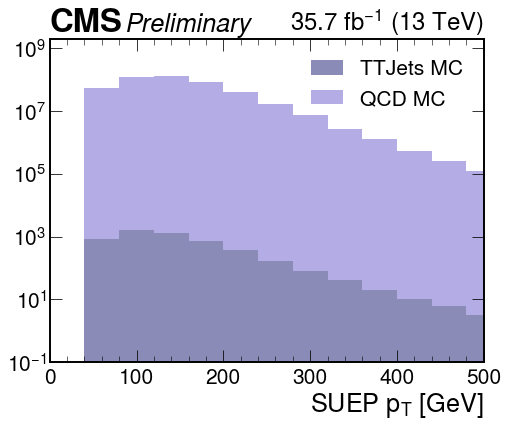

In [16]:
plot_label = 'SUEP_pt_Cluster'
year = '2017'
output_label="Oct31_HTJECcut"
file_ext=".pdf"
temp = '4.0'
mPhi = '2.0'
decay = 'generic'
samples = ['TTJets_'+year, 'QCD_HT_'+year]
#'mS125_T'+temp+'_mPhi'+mPhi+'_'+decay+'_'+year,
#            'mS400_T'+temp+'_mPhi'+mPhi+'_'+decay+'_'+year,
#           'mS700_T'+temp+'_mPhi'+mPhi+'_'+decay+'_'+year,
#            'mS1000_T'+temp+'_mPhi'+mPhi+'_'+decay+'_'+year]
labels = ['TTJets MC', 'QCD MC']
#          r'$m_{S}=125$ GeV',r'$m_{S}=400$ GeV',r'$m_{S}=700$ GeV',r'$m_{S}=1000$ GeV']
density = False

hep.cms.label(llabel='Preliminary', data=False, lumi=lumiLabel(year,scouting=True))
hBkg, hSignal, cSignal = [], [], []
lBkg, lSignal, cBkg = [], [], []
hData, lData, cData = [], [], []
for label, sample in zip(labels, samples):
    if sample not in plots.keys(): continue
    print(sample)
    h = plots[sample][plot_label][::2j]
    if density:
        h = h/h.sum().value
    if 'mS' in sample: 
        hSignal.append(h)
        lSignal.append(label)
        cSignal.append(getColor(sample))
    elif 'data' in sample:
        hData.append(h)
        lData.append(label)
        cData.append(getColor(sample))
    else: 
        hBkg.append(h)
        lBkg.append(label)
        cBkg.append(getColor(sample))
    
hep.histplot(hBkg, yerr=True, label=lBkg, color=cBkg, histtype='fill', alpha=0.5, stack=True) 
#hep.histplot(hData, yerr=True, label=lData, color=cData, stack=False) 
#hep.histplot(hSignal, yerr=True, label=lSignal, color=cSignal, stack=False) 

# tweak these by hand, as needed
plt.ylim(1e-1,2e9)
plt.xlim(0,500)
plt.legend(loc='best')
plt.yscale("log")

# save and show
#if saveToAN: plt.savefig(AN_label.format("HT_"+year))
plt.savefig(output_label+plot_label+"_"+year+file_ext)

TTJets_2017
QCD_HT_2017


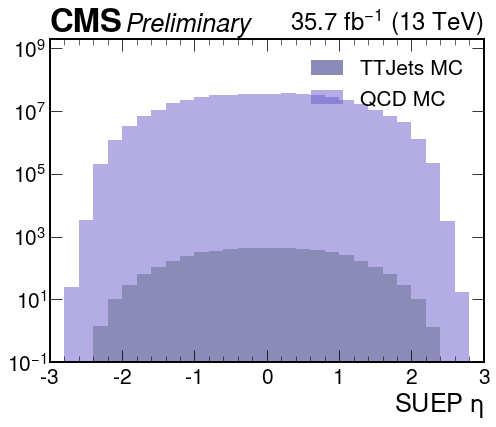

In [17]:
plot_label = 'SUEP_eta_Cluster'
year = '2017'
output_label="Oct31_HTJECcut"
file_ext=".pdf"
temp = '4.0'
mPhi = '2.0'
decay = 'generic'
samples = ['TTJets_'+year, 'QCD_HT_'+year]
#'mS125_T'+temp+'_mPhi'+mPhi+'_'+decay+'_'+year,
#            'mS400_T'+temp+'_mPhi'+mPhi+'_'+decay+'_'+year,
#           'mS700_T'+temp+'_mPhi'+mPhi+'_'+decay+'_'+year,
#            'mS1000_T'+temp+'_mPhi'+mPhi+'_'+decay+'_'+year]
labels = ['TTJets MC', 'QCD MC']
#          r'$m_{S}=125$ GeV',r'$m_{S}=400$ GeV',r'$m_{S}=700$ GeV',r'$m_{S}=1000$ GeV']
density = False

hep.cms.label(llabel='Preliminary', data=False, lumi=lumiLabel(year,scouting=True))
hBkg, hSignal, cSignal = [], [], []
lBkg, lSignal, cBkg = [], [], []
hData, lData, cData = [], [], []
for label, sample in zip(labels, samples):
    if sample not in plots.keys(): continue
    print(sample)
    h = plots[sample][plot_label][::2j]
    if density:
        h = h/h.sum().value
    if 'mS' in sample: 
        hSignal.append(h)
        lSignal.append(label)
        cSignal.append(getColor(sample))
    elif 'data' in sample:
        hData.append(h)
        lData.append(label)
        cData.append(getColor(sample))
    else: 
        hBkg.append(h)
        lBkg.append(label)
        cBkg.append(getColor(sample))
    
hep.histplot(hBkg, yerr=True, label=lBkg, color=cBkg, histtype='fill', alpha=0.5, stack=True) 
#hep.histplot(hData, yerr=True, label=lData, color=cData, stack=False) 
#hep.histplot(hSignal, yerr=True, label=lSignal, color=cSignal, stack=False) 

# tweak these by hand, as needed
plt.ylim(1e-1,2e9)
plt.xlim(-3,3)
plt.legend(loc='best')
plt.yscale("log")

# save and show
#if saveToAN: plt.savefig(AN_label.format("HT_"+year))
plt.savefig(output_label+plot_label+"_"+year+file_ext)

TTJets_2017
QCD_HT_2017


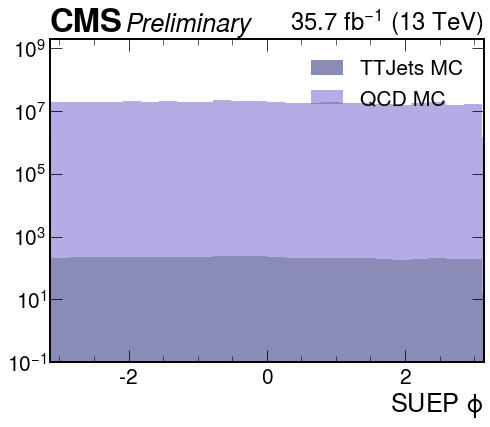

In [18]:
plot_label = 'SUEP_phi_Cluster'
year = '2017'
output_label="Oct31_HTJECcut"
file_ext=".pdf"
temp = '4.0'
mPhi = '2.0'
decay = 'generic'
samples = ['TTJets_'+year, 'QCD_HT_'+year]
#'mS125_T'+temp+'_mPhi'+mPhi+'_'+decay+'_'+year,
#            'mS400_T'+temp+'_mPhi'+mPhi+'_'+decay+'_'+year,
#           'mS700_T'+temp+'_mPhi'+mPhi+'_'+decay+'_'+year,
#            'mS1000_T'+temp+'_mPhi'+mPhi+'_'+decay+'_'+year]
labels = ['TTJets MC', 'QCD MC']
#          r'$m_{S}=125$ GeV',r'$m_{S}=400$ GeV',r'$m_{S}=700$ GeV',r'$m_{S}=1000$ GeV']
density = False

hep.cms.label(llabel='Preliminary', data=False, lumi=lumiLabel(year,scouting=True))
hBkg, hSignal, cSignal = [], [], []
lBkg, lSignal, cBkg = [], [], []
hData, lData, cData = [], [], []
for label, sample in zip(labels, samples):
    if sample not in plots.keys(): continue
    print(sample)
    h = plots[sample][plot_label][::2j]
    if density:
        h = h/h.sum().value
    if 'mS' in sample: 
        hSignal.append(h)
        lSignal.append(label)
        cSignal.append(getColor(sample))
    elif 'data' in sample:
        hData.append(h)
        lData.append(label)
        cData.append(getColor(sample))
    else: 
        hBkg.append(h)
        lBkg.append(label)
        cBkg.append(getColor(sample))
    
hep.histplot(hBkg, yerr=True, label=lBkg, color=cBkg, histtype='fill', alpha=0.5, stack=True) 
#hep.histplot(hData, yerr=True, label=lData, color=cData, stack=False) 
#hep.histplot(hSignal, yerr=True, label=lSignal, color=cSignal, stack=False) 

# tweak these by hand, as needed
plt.ylim(1e-1,2e9)
plt.xlim(-3.14,3.14)
plt.legend(loc='best')
plt.yscale("log")

# save and show
#if saveToAN: plt.savefig(AN_label.format("HT_"+year))
plt.savefig(output_label+plot_label+"_"+year+file_ext)

### 1D Comparison - S1 & Efficiency

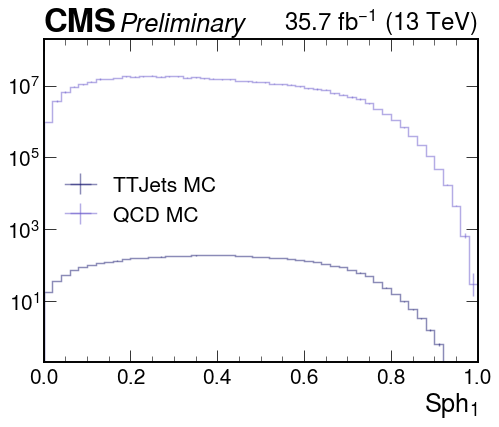

In [19]:
plt.rcParams['figure.figsize'] = [8, 6]
plot_label = 'SUEP_S1_Cluster'
year = '2017'
output_label="Nov10_HTcut_noJEC"
file_ext=".png"
temp = '3.0'
mPhi = '3.0'
decay = 'generic'
samples = ['TTJets_'+year, 'QCD_HT_'+year] 
#            'mS125_T'+temp+'_mPhi'+mPhi+'_'+decay+'_'+year,
#            'mS200_T'+temp+'_mPhi'+mPhi+'_'+decay+'_'+year,
#            'mS400_T'+temp+'_mPhi'+mPhi+'_'+decay+'_'+year,
#            'mS700_T'+temp+'_mPhi'+mPhi+'_'+decay+'_'+year,
#            'mS1000_T'+temp+'_mPhi'+mPhi+'_'+decay+'_'+year]
labels = ['TTJets MC', 'QCD MC']
#          r'$m_{S}=125$ GeV',r'$m_{S}=200$ GeV',r'$m_{S}=400$ GeV',r'$m_{S}=700$ GeV',r'$m_{S}=1000$ GeV']
density = False

hep.cms.label(llabel='Preliminary', data=False, lumi=lumiLabel(year,scouting=True))
hBkg, hSignal, cSignal = [], [], []
lBkg, lSignal, cBkg = [], [], []
for label, sample in zip(labels, samples):
    if sample not in plots.keys(): 
        print("Missing", sample)
        continue
    h = plots[sample][plot_label][::2j]
    if density:
        h = h/h.sum().value
    if 'mS' in sample: 
        hSignal.append(h)
        lSignal.append(label)
        cSignal.append(getColor(sample))
    else: 
        hBkg.append(h)
        lBkg.append(label)
        cBkg.append(getColor(sample))
        
hep.histplot(hBkg, yerr=True, label=lBkg, color=cBkg, histtype='step', alpha=0.5, stack=True) 
if len(hSignal)>0: hep.histplot(hSignal, yerr=True, label=lSignal, color=cSignal, stack=False) 

# tweak these by hand, as needed
plt.ylim(0.2,2e8)
plt.xlim(0,1)
plt.legend(loc='best')
plt.yscale("log")

# save and show
#if saveToAN: plt.savefig(AN_label.format("sph_"+year))
plt.savefig(output_label+plot_label+"_"+year+file_ext,transparent=True)
plt.show()

In [20]:
(hBkg[0].sum()+hBkg[1].sum()).value

461995728.17820454

In [21]:
for i in range(0,50):
    print("bin",i, (hBkg[0][i]+hBkg[1][i]).value/(hBkg[0].sum()+hBkg[1].sum()).value)

bin 0 0.0020965181831488233
bin 1 0.007913276752673516
bin 2 0.014214153306661755
bin 3 0.020152837201394654
bin 4 0.023655443047544022
bin 5 0.027555254289211156
bin 6 0.03310532640473928
bin 7 0.03301928818396154
bin 8 0.03524870607408863
bin 9 0.03888071817876748
bin 10 0.038340013188293255
bin 11 0.03910152373943084
bin 12 0.04058553521211343
bin 13 0.03883813571901979
bin 14 0.03895377676587934
bin 15 0.03886700742224753
bin 16 0.03607707854127162
bin 17 0.03719453688302617
bin 18 0.035056328347467205
bin 19 0.03377741940495673
bin 20 0.03297757298667012
bin 21 0.03295019471503864
bin 22 0.028749476178914688
bin 23 0.02872312459293149
bin 24 0.027539521935907658
bin 25 0.026789080231557027
bin 26 0.024655249409658256
bin 27 0.02327208122452478
bin 28 0.02277670745017079
bin 29 0.020645578169504557
bin 30 0.018077744953414434
bin 31 0.017282876559035657
bin 32 0.01686464801751979
bin 33 0.013282126241766055
bin 34 0.01203312942163015
bin 35 0.010505318385869157
bin 36 0.00927544848

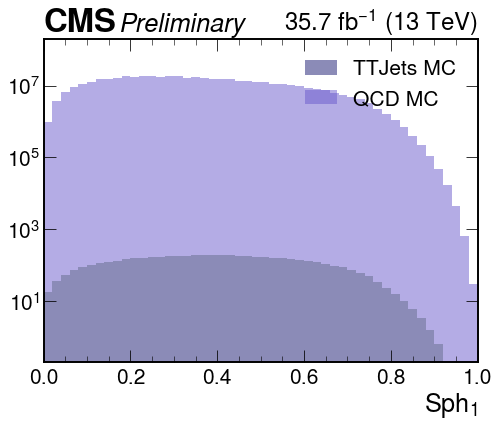

In [22]:
plt.rcParams['figure.figsize'] = [8, 6]
plot_label = 'SUEP_S1_Cluster'
year = '2017'
output_label="Nov8_HTJECcut"
file_ext=".pdf"
temp = '3.0'
mPhi = '3.0'
decay = 'generic'
samples = ['TTJets_'+year, 'QCD_HT_'+year] 
#            'mS125_T'+temp+'_mPhi'+mPhi+'_'+decay+'_'+year,
#            'mS200_T'+temp+'_mPhi'+mPhi+'_'+decay+'_'+year,
#            'mS400_T'+temp+'_mPhi'+mPhi+'_'+decay+'_'+year,
#            'mS700_T'+temp+'_mPhi'+mPhi+'_'+decay+'_'+year,
#            'mS1000_T'+temp+'_mPhi'+mPhi+'_'+decay+'_'+year]
labels = ['TTJets MC', 'QCD MC']
#          r'$m_{S}=125$ GeV',r'$m_{S}=200$ GeV',r'$m_{S}=400$ GeV',r'$m_{S}=700$ GeV',r'$m_{S}=1000$ GeV']
density = False

hep.cms.label(llabel='Preliminary', data=False, lumi=lumiLabel(year,scouting=True))
hBkg17, hSignal17, cSignal17 = [], [], []
lBkg17, lSignal17, cBkg17 = [], [], []
for label, sample in zip(labels, samples):
    if sample not in plots.keys(): 
        print("Missing", sample)
        continue
    h = plots[sample][plot_label][::2j]
    if density:
        h = h/h.sum().value
    if 'mS' in sample: 
        hSignal17.append(h)
        lSignal17.append(label)
        cSignal17.append(getColor(sample))
    else: 
        hBkg17.append(h)
        lBkg17.append(label)
        cBkg17.append(getColor(sample))
        
hep.histplot(hBkg17, yerr=True, label=lBkg17, color=cBkg17, histtype='fill', alpha=0.5, stack=True) 
if len(hSignal)>0: hep.histplot(hSignal17, yerr=True, label=lSignal17, color=cSignal17, stack=False) 

# tweak these by hand, as needed
plt.ylim(0.2,2e8)
plt.xlim(0,1)
plt.legend(loc='best')
plt.yscale("log")

# save and show
#if saveToAN: plt.savefig(AN_label.format("sph_"+year))
plt.savefig(output_label+plot_label+"_"+year+file_ext)
plt.show()

In [23]:
difference=[]
for i in range(0,50):
    difference.append(((hBkg[0][i]+hBkg[1][i]).value/(hBkg[0].sum()+hBkg[1].sum()).value-(hBkg17[0][i]+hBkg17[1][i]).value/(hBkg17[0].sum()+hBkg17[1].sum()).value)/((hBkg[0][i]+hBkg[1][i]).value/(hBkg[0].sum()+hBkg[1].sum()).value))
    print("bin",i, "normalized 2018",(hBkg[0][i]+hBkg[1][i]).value/(hBkg[0].sum()+hBkg[1].sum()).value,
          ", normalized 2017",
          (hBkg17[0][i]+hBkg17[1][i]).value/(hBkg17[0].sum()+hBkg17[1].sum()).value,
          ", relative difference",((hBkg[0][i]+hBkg[1][i]).value/(hBkg[0].sum()+hBkg[1].sum()).value-(hBkg17[0][i]+hBkg17[1][i]).value/(hBkg17[0].sum()+hBkg17[1].sum()).value)/((hBkg[0][i]+hBkg[1][i]).value/(hBkg[0].sum()+hBkg[1].sum()).value))

bin 0 normalized 2018 0.0020965181831488233 , normalized 2017 0.0020965181831488233 , relative difference 0.0
bin 1 normalized 2018 0.007913276752673516 , normalized 2017 0.007913276752673516 , relative difference 0.0
bin 2 normalized 2018 0.014214153306661755 , normalized 2017 0.014214153306661755 , relative difference 0.0
bin 3 normalized 2018 0.020152837201394654 , normalized 2017 0.020152837201394654 , relative difference 0.0
bin 4 normalized 2018 0.023655443047544022 , normalized 2017 0.023655443047544022 , relative difference 0.0
bin 5 normalized 2018 0.027555254289211156 , normalized 2017 0.027555254289211156 , relative difference 0.0
bin 6 normalized 2018 0.03310532640473928 , normalized 2017 0.03310532640473928 , relative difference 0.0
bin 7 normalized 2018 0.03301928818396154 , normalized 2017 0.03301928818396154 , relative difference 0.0
bin 8 normalized 2018 0.03524870607408863 , normalized 2017 0.03524870607408863 , relative difference 0.0
bin 9 normalized 2018 0.03888071

In [96]:
print(difference)

[0.00558885032832769, 0.009286824044490221, 0.007965794714221998, 0.007987790811681958, 0.007472447161478758, 0.013231744246876136, 0.007187253811232464, 0.009597524379655746, 0.012244738474055704, 0.009387656523112133, 0.009212270898132164, 0.011337564355361417, 0.00875804915017312, 0.004959917120344597, 0.0016431989628426424, 0.003794874241294865, 0.002005171542588895, -0.0017862250282361328, -0.0032624906627835896, 0.0007712892080429821, -0.001164153011823237, -0.0030537197552372346, -0.002893296569985441, -0.003581014781075304, -0.006996420809088728, -0.00650485852085395, -0.011777680322524737, -0.010873050625265139, -0.008482246900328682, -0.014747613395316007, -0.01613755436168701, -0.016207816844657583, -0.013121516665419847, -0.011654204725425924, -0.014796103446563205, -0.022162347091645846, -0.01376177490958873, -0.02934912264327693, -0.01863423942489331, -0.025806212740366163, -0.014017093347727756, -0.032785801770163416, -0.031955378338473096, 0.0005717811680387506, -0.0496

In [93]:
sqrt(hBkg[0][0].variance)

0.405668140530209

In [24]:
plot_label = 'SUEP_S1_Cluster70'

temp = '3.0'
mPhi = '3.0'
decay = 'generic'
samples = ['mS125_T'+temp+'_mPhi'+mPhi+'_'+decay,
            'mS400_T'+temp+'_mPhi'+mPhi+'_'+decay,
            'mS700_T'+temp+'_mPhi'+mPhi+'_'+decay,
            'mS1000_T'+temp+'_mPhi'+mPhi+'_'+decay]

for sample in samples:
    line = ''
    
    mS = sample[sample.find('_mS')+3:sample.find('_T')]
    label = '$T = '+str(temp)+' \GeV$, $m_{\phi}= '+str(mPhi)+'\GeV$, $m_S = ' + str(mS) + ' \GeV$'
    line += label
    line += ' & '
    
    for i, year in enumerate(['2016', '2017', '2018']):
        tot = plots[sample+'_'+year][plot_label].sum().value
        passing = plots[sample+'_'+year][plot_label][0.5j:].sum().value
        line += str(round(passing/tot, 2))
        if i != 2:
            line += ' & '
        else:
            line += ' \\\\ '
    print(line)

KeyError: 'mS125_T3.0_mPhi3.0_generic_2016'

### SUEP ISR Comparison

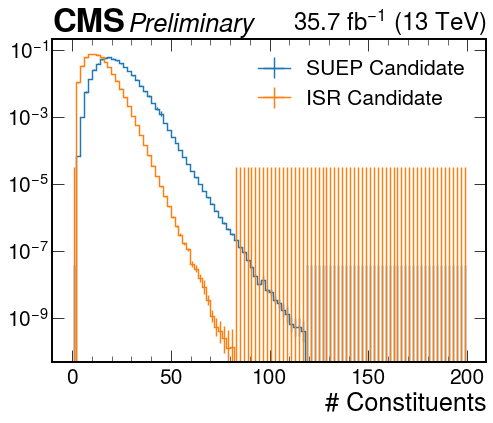

In [25]:
variable = 'nconst'
year = '2017'
sample = 'MC_{}'.format(year)

density = True

plot_labels = ['SUEP_{}_Cluster'.format(variable), 
               'ISR_{}_ClusterInverted'.format(variable)]
objects = ['SUEP Candidate', 'ISR Candidate']

fig, ax = plt.subplots()
hep.cms.label(llabel='Preliminary',data=False, lumi=lumiLabel(year,scouting=True))

for plot_label, obj in zip(plot_labels, objects): 
    h = plots[sample][plot_label][:200j:2j]
    hep.histplot(h, yerr=True, density=density, label=obj) 

fig.axes[0].set_yscale("log")
fig.axes[0].legend()

# save and show
if saveToAN: plt.savefig(AN_label.format("ISR_SUEP_"+variable))
plt.savefig(output_label+plot_label+"_"+year+file_ext)
plt.show()

## Ch. 5 Background Estimation with Extended ABCD

### 2D Background

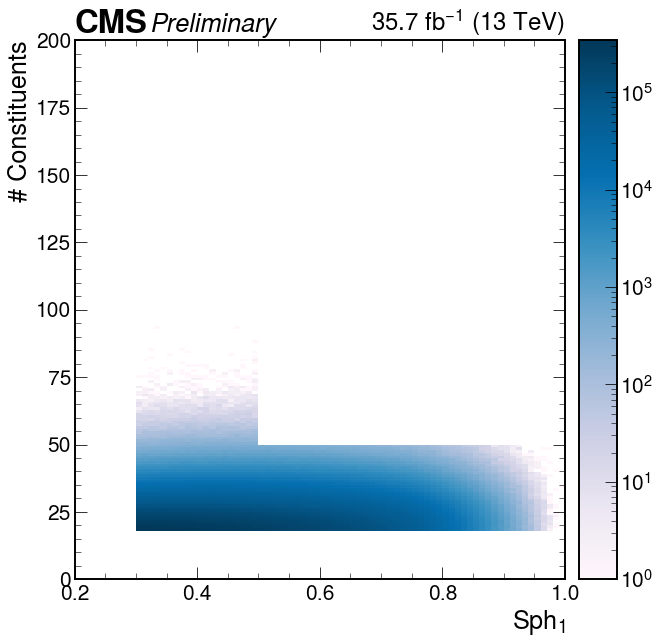

In [26]:
plot_label = '2D_SUEP_S1_vs_SUEP_nconst_Cluster'
year = '2017'
sample = 'data_'+year
doLinearFit = False
output_label = "Oct31"
file_ext=".png"
fig, ax = plt.subplots(figsize=(10, 10))
    
if plots[sample][plot_label].sum().value == 0:
    print("Histogram empty for sample", sample)

h = plots[sample][plot_label]
h = h[0.3j:,18j:]

hep.cms.label(llabel='Preliminary',data=False, lumi=lumiLabel(year,scouting=True))
_ = hep.hist2dplot(h, 
           norm=matplotlib.colors.LogNorm(),
           cmap = 'PuBu',
           cbar=True,
           label=sample) 

if doLinearFit:
    p = linearFit2DHist(h)
    plt.plot(h.axes[0].centers, p(h.axes[0].centers), label="Linear fit result:"+str(p), color='black', linestyle='dashed')
    plt.legend()

plt.ylim(0,200)
plt.xlim(0.2,1.0)

#if saveToAN: plt.savefig(AN_label.format("2D_decorrelate_"+year))
plt.savefig(output_label+"2D_decorrelate_"+year+file_ext)
plt.show()

### Slices of ABCD Variables

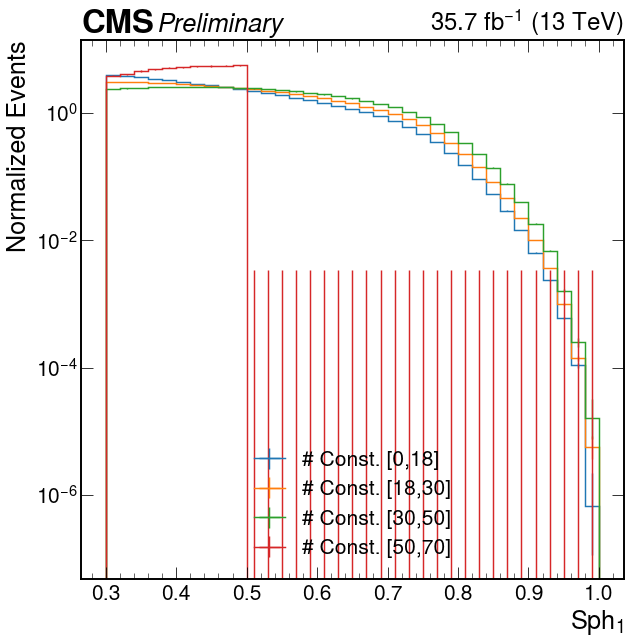

In [28]:
# parameters
plot_label = '2D_SUEP_S1_vs_SUEP_nconst_Cluster'
year = '2017'
#samples = ['QCD_HT_'+year, 'TTJets_'+year] # these are ADDED
samples = ['data_2017']
output_label = "Oct31"
fig, ax = plt.subplots(figsize=(10, 10))
hep.cms.label(llabel='Preliminary',data=False, lumi=round(lumiLabel(year,scouting=True),1))

#slices = [[0j,20j],[20j,40j],[40j,60j],[60j,80j],[80j,300j]]
slices = [[0j,18j],[18j,30j],[30j,50j],[50j,70j]]
for j in range(len(slices)):
    val_lo = slices[j][0]
    val_up = slices[j][1]

    for i, sample in enumerate(samples):
        if i==0: h = plots[sample][plot_label][0.3j::2j,val_lo:val_up:sum]
        else: h += plots[sample][plot_label][0.3j::2j,val_lo:val_up:sum]
         
    hep.histplot(h,
                 yerr=True, density=True, 
                 label="# Const. [{0},{1}]".format(round(val_lo.imag), round(val_up.imag)))    

plt.legend()
#plt.ylim(1e-6,1e0)
plt.yscale('log')
plt.ylabel("Normalized Events")
plt.xlabel(r"$Sph_{1}$")

#if saveToAN: plt.savefig(AN_label.format("1D_decorrelate_" + year))
plt.savefig(output_label + "1D_decorrelate_" + year + file_ext,  bbox_inches='tight')
plt.show()

### 2D Background with ABCD Regions

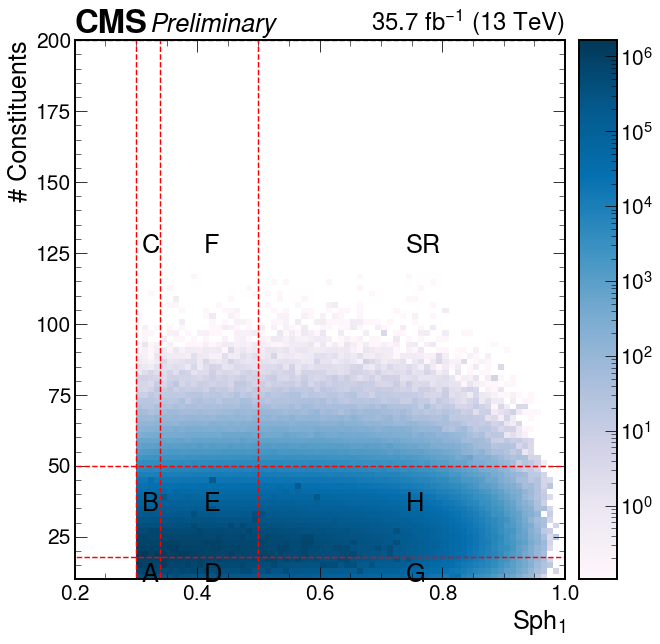

In [29]:
plot_label = '2D_SUEP_S1_vs_SUEP_nconst_Cluster'
year = '2017'
samples = ['QCD_HT_'+year, 'TTJets_'+year] # NOTE: these are ADDED

draw_lines = True
lines_x = [0.3, 0.34, 0.5, 1.0]
lines_y = [0, 18, 50, 200]

fig, ax = plt.subplots(figsize=(10, 10))

k = 0
regions = ['A','B','C','D','E','F','G','H','SR']
for i in range(len(lines_x)-1):
    for j in range(len(lines_y)-1):
        xloc = (lines_x[i+1] + lines_x[i])/2 - 0.01
        yloc = (lines_y[j+1] + lines_y[j])/2
        plt.text(xloc, yloc, regions[k])
        k+=1
    
for i, sample in enumerate(samples):
    if i == 0: h = plots[sample][plot_label].copy()
    else: h += plots[sample][plot_label].copy()
    
bins = np.linspace(0,500,10)
h = h[0.3j:,0j::2j]

hep.cms.label(llabel='Preliminary',data=False, lumi=lumiLabel(year,scouting=True))
_ = hep.hist2dplot(h, 
           norm=matplotlib.colors.LogNorm(),
           cmap = 'PuBu',
           cbar=True,
           label=sample) 

# draw lines to visualize ABCD regions
if draw_lines:
    for y in lines_y: plt.plot([0,10000], [y,y], color='red', linestyle='dashed')
    for x in lines_x: plt.plot([x,x], [0,1000], color='red', linestyle='dashed')

plt.ylim(10,200)
plt.xlim(0.2,1.0)

if saveToAN: plt.savefig(AN_label.format("extendedABCD_regions_2018"))
plt.savefig(output_label+plot_label+"_"+year+file_ext)
plt.show()

### ABCD 1D Backgrounds

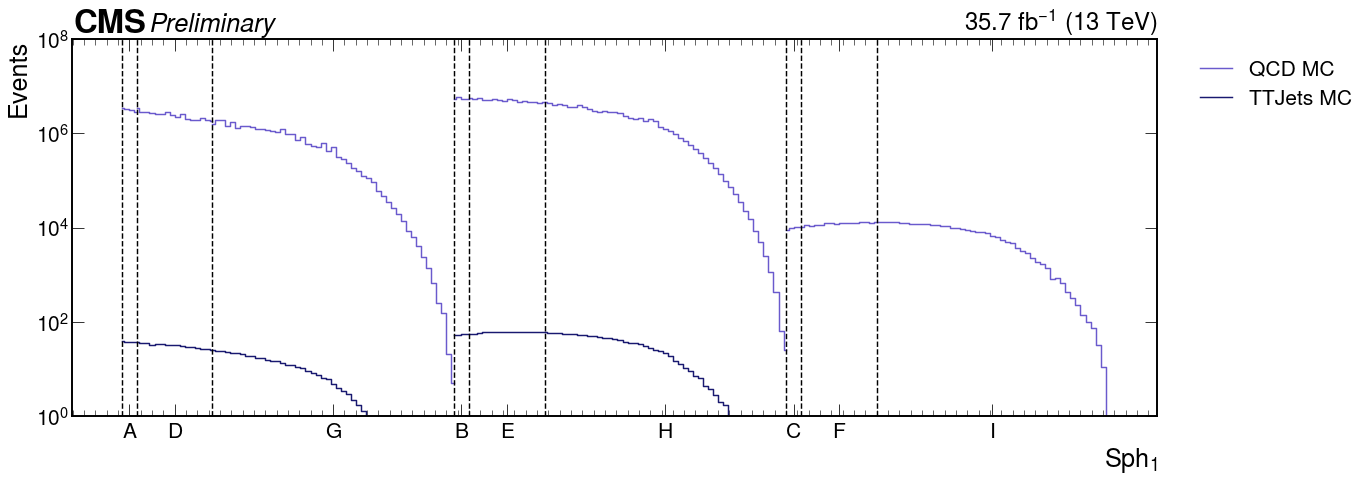

In [30]:
x = 'ABCDEFGHI'
y = 'ADGBEHCFI'
year = '2017'
plot_labels = ['SUEP_S1_Cluster']
samples = ['QCD_HT_'+year, 'TTJets_'+year]
#samples = ['QCD_HT_'+year]
labels = ['QCD MC', 'TTJets MC']
#labels = ['QCD']

for plot_label in plot_labels:

    fig, ax = plot_all_regions(plots, 'A_'+plot_label, samples, 
                               labels=labels, regions=y, density=False)
    hep.cms.label(llabel='Preliminary', data=False, lumi=lumiLabel(year,scouting=True), ax=ax)

    ax.set_ylim(1e0, 1e8)
    ax.set_xlabel(r"$Sph_1$")

    if saveToAN: fig.savefig(AN_label.format('backgrounds_'+year), bbox_inches='tight')
    fig.savefig(output_label + 'backgrounds_' + year + file_ext, bbox_inches='tight')

### F, C, SR Distributions

Text(0, 1, 'Error on $\\int^{UB}_{70} F ~/~ \\int^{UB}_{70} C$')

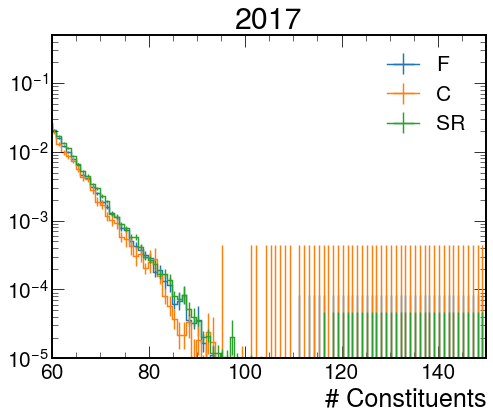

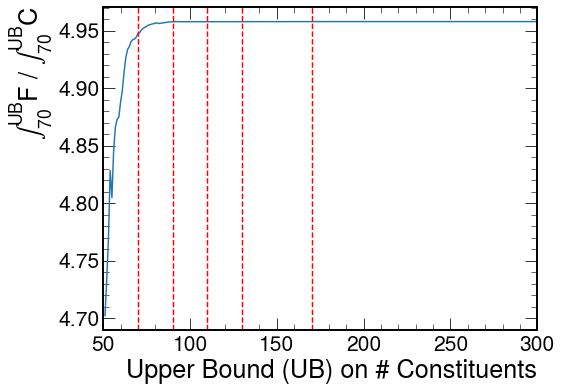

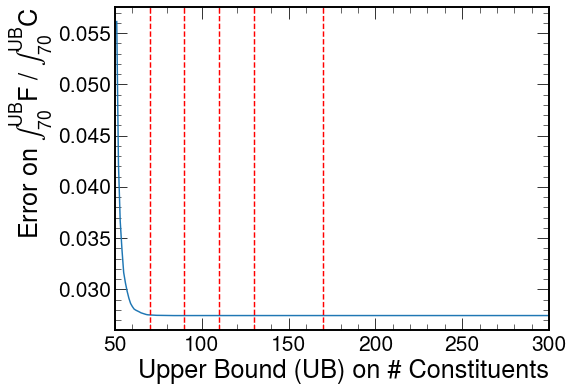

In [31]:
plot_label = '2D_SUEP_S1_vs_SUEP_nconst_Cluster'
year = '2017'
sample = 'MC'
xregions = [0.3j, 0.34j, 0.5j, 1.0j]
yregions = [0j, 18j, 50j, 1000j]
new_bins = [70, 90, 100, 110, 170, 500]
rebin = False
density = True

abcd = plots["{}_{}".format(sample,year)][plot_label].copy()

C = abcd[xregions[0]:xregions[1]:sum, yregions[-2]:].copy()
F = abcd[xregions[1]:xregions[2]:sum, yregions[-2]:].copy()
SR = abcd[xregions[-2]::sum, yregions[-2]:].copy()

cuts = np.linspace(yregions[-2].imag+1, yregions[-1].imag, int((yregions[-1].imag-yregions[-2].imag)))
ratios = []
errs = []
for n in cuts:
    sumC = C[yregions[-2]:n*1.0j].sum().value
    sumF = F[yregions[-2]:n*1.0j].sum().value
    err = np.sqrt( sumF/sumC**2 + sumF**2 / sumC**3)
    ratios.append(sumF/sumC)
    errs.append(err)

if rebin:
    F = rebin_piecewise(F, new_bins)
    C = rebin_piecewise(C, new_bins)
    SR = rebin_piecewise(SR, new_bins)

    print("F", F.values())
    print("C", C.values())
    print("SR", SR.values())

if density:
    F /= F.sum().value
    C /= C.sum().value
    SR /= SR.sum().value

fig = plt.figure()
ax = fig.subplots()
ax.set_title(year)
hep.histplot(F, yerr=True, label='F', ax=ax) 
hep.histplot(C, yerr=True, label='C', ax=ax) 
hep.histplot(SR, yerr=True, label='SR', ax=ax)
ax.set_yscale("log")
ax.set_xlim(60, 150)
ax.set_ylim(1e-5, 5e-1)
ax.legend()
# if saveToAN: fig.savefig(AN_label.format("SRFC_"+sample+"_"+year))
# fig.savefig(output_label+"SRFC_"+sample+"_"+year+file_ext)

fig = plt.figure()
ax = fig.subplots()
ax.plot(cuts, ratios)
ax.axvline(70, color='red', linestyle='dashed')
ax.axvline(90, color='red', linestyle='dashed')
ax.axvline(110, color='red', linestyle='dashed')
ax.axvline(130, color='red', linestyle='dashed')
ax.axvline(170, color='red', linestyle='dashed')
ax.axvline(500, color='red', linestyle='dashed')
ax.set_xlim(50, 300)
ax.set_xlabel("Upper Bound (UB) on # Constituents")
ax.set_ylabel(r"$\int^{UB}_{70} F ~/~ \int^{UB}_{70} C$")

fig = plt.figure()
ax = fig.subplots()
ax.plot(cuts, errs)
ax.axvline(70, color='red', linestyle='dashed')
ax.axvline(90, color='red', linestyle='dashed')
ax.axvline(110, color='red', linestyle='dashed')
ax.axvline(130, color='red', linestyle='dashed')
ax.axvline(170, color='red', linestyle='dashed')
ax.axvline(500, color='red', linestyle='dashed')
ax.set_xlim(50, 300)
ax.set_xlabel("Upper Bound (UB) on # Constituents")
ax.set_ylabel(r"Error on $\int^{UB}_{70} F ~/~ \int^{UB}_{70} C$")

### F/C Values

2017
Ratio F/C: [1.00334743 0.77906977        nan        nan        nan]
Error on F/C [0.16461082 1.10177103 0.         0.         0.        ]
Ratio SR/F: [nan nan nan nan nan]
Error on Ratio SR/F [nan nan  0.  0.  0.]
Predicted F/C [1.0033474277660324, 0.7790697674418605, 0.5547921071176887, 0.2183756166314308, -1.8561927413671586]
Midpoints [80.0, 100.0, 120.0, 150.0, 335.0]



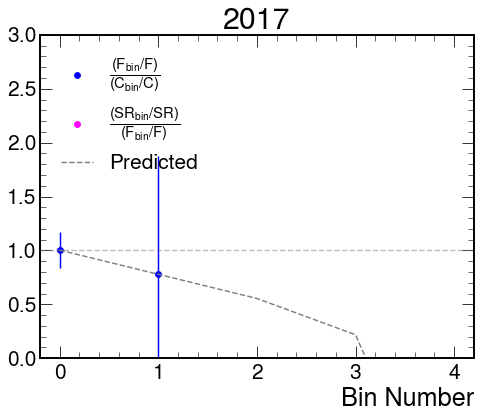

In [32]:
plot_label = '2D_SUEP_S1_vs_SUEP_nconst_Cluster'
sample = 'data'
xregions = [0.3j, 0.4j, 0.5j, 1.0j]
yregions = [30j, 50j, 70j, 1000j]
new_bins = [70, 90, 110, 130, 170, 500]
rebin = True    # RUN BOTH!

systABCD = {}
#for year in ['2016', '2017', '2018']:
for year in ['2017']:
    abcd = plots["{}_{}".format(sample,year)][plot_label].copy()
    C = abcd[xregions[0]:xregions[1]:sum, yregions[-2]:].copy()
    F = abcd[xregions[1]:xregions[2]:sum, yregions[-2]:].copy()
    SR = abcd[xregions[-2]::sum, yregions[-2]:].copy()

    if rebin:
        F_binned = rebin_piecewise(F, new_bins)/F.sum().value
        C_binned = rebin_piecewise(C, new_bins)/C.sum().value
        SR_binned = rebin_piecewise(SR, new_bins)/SR.sum().value
    else:
        F_binned = F.copy()[::4j]/F.sum().value
        C_binned = C.copy()[::4j]/C.sum().value
        SR_binned = SR.copy()[::4j]/SR.sum().value

    ratio_FC = (F_binned.values())/(C_binned.values()) 
    ratio_SRF = (SR_binned.values())/(F_binned.values()) 
    ratio_FC_err = np.where(
        C_binned.values() > 0,
        np.sqrt((C_binned.values()**-2)*(F_binned.variances()) + (F_binned.values()**2 * C_binned.values()**-4)*(C_binned.variances())),
        0
    )
    ratio_SRF_err = np.where(
        F_binned.values() > 0,
        np.sqrt((F_binned.values()**-2)*(SR_binned.variances()) + (SR_binned.values()**2 * F_binned.values()**-4)*(F_binned.variances())),
        0
    )

    systABCD[year] = {}
    #systABCD[year]['values'] = ratio_FC
    #systABCD[year]['errors'] = ratio_FC_err

    if rebin:
        midpoints = [(new_bins[i] + new_bins[i+1]) / 2 for i in range(len(new_bins) - 1)]
        slope = (ratio_FC[1] - ratio_FC[0]) / (midpoints[1] - midpoints[0])
        intercept = ratio_FC[0] - slope * midpoints[0]
        predicted_FC = np.concatenate((ratio_FC[:2],[slope * xi + intercept for xi in midpoints[2:]]))
        predicted_FC = [x if x < 2 else 2 for x in predicted_FC]
        
        systABCD[year]['values'] = predicted_FC

        print(year)
        print("Ratio F/C:", ratio_FC)
        print("Error on F/C", ratio_FC_err)
        print("Ratio SR/F:", ratio_SRF)
        print("Error on Ratio SR/F", ratio_SRF_err)
        print("Predicted F/C", predicted_FC)
        print("Midpoints", midpoints)
        print()
        
    if rebin:
        xvalues = np.arange(0, len(ratio_SRF))
    else:
        xvalues = F_binned.axes[0].centers

    fig = plt.figure()
    ax = fig.subplots()
    ax.set_title(year)
    ax.scatter(xvalues, ratio_FC, color='blue', label=r'$\frac{(F_{bin}/F)}{(C_{bin}/C)}$')
    ax.errorbar(xvalues, ratio_FC, yerr=ratio_FC_err, color='blue', linestyle='')
    ax.scatter(xvalues, ratio_SRF, color='magenta', label=r'$\frac{(SR_{bin}/SR)}{(F_{bin}/F)}$')
    ax.errorbar(xvalues, ratio_SRF, yerr=ratio_SRF_err, color='magenta', linestyle='')
    ax.axhline(1, linestyle='dashed', color='gray', alpha=0.5)
    
    if rebin: 
        ax.plot(xvalues, predicted_FC, color='gray', linestyle='dashed', label='Predicted')
        ax.set_ylim(0,3)
        ax.set_xticks([0,1,2,3,4])
        ax.set_xlabel("Bin Number")
    else:
        ax.set_ylim(0.8, 2)
        ax.set_xlim(70, 150)
        ax.set_xlabel("# Constituents")

    ax.legend(loc='upper left')
    
    if rebin:
        if saveToAN: fig.savefig(AN_label.format("FC_"+sample+"_"+year))
        fig.savefig(output_label+"FC_"+sample+"_"+year+file_ext)
    else:
        if saveToAN: fig.savefig(AN_label.format("FC_unbinned_"+sample+"_"+year))
        fig.savefig(output_label+"FC_unbinned_"+sample+"_"+year+file_ext)

### Contamination in Regions

KeyError: 'A_SUEP_S1_Cluster70'

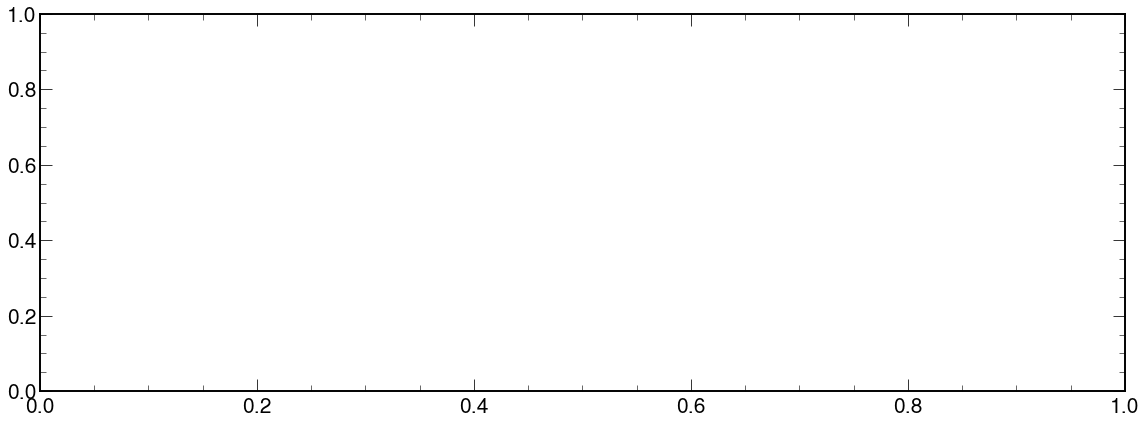

In [35]:
# mu = 1448.16781/34.8
# plots['scaled_M125_2018'] = fill_utils.apply_normalization(plots['M125_2018'], mu)

x = 'ABCDEFGHI'
y = 'ADGBEHCFI'
year = '2017'
plot_labels = ['SUEP_S1_Cluster70']
samples = ['MC_'+year] + ['mS{}_T3.0_mPhi3.0_generic_{}'.format(m, year) for m in [125,200,300,400,500,600,700,800,900,1000]]
labels = ['QCD and TTJets', r'$M_{S} = 125 GeV$', r'$M_{S} = 200 GeV$', r'$M_{S} = 300 GeV$',
          r'$M_{S} = 400 GeV$', r'$M_{S} = 500 GeV$', r'$M_{S} = 600 GeV$', r'$M_{S} = 700 GeV$',
          r'$M_{S} = 800 GeV$', r'$M_{S} = 900 GeV$', r'$M_{S} = 1000 GeV$']

for plot_label in plot_labels:

    fig, ax = plot_all_regions(plots, 'A_'+plot_label, samples, 
                               labels=labels, regions=y, density=False)
    hep.cms.label(llabel='Preliminary', data=False, lumi=lumiLabel(year), ax=ax)

    ax.set_ylim(1e0, 1e6)
    ax.set_xlabel(r"$Sph_1$")

    if saveToAN: fig.savefig(AN_label.format('contamination_'+year), bbox_inches='tight')
    fig.savefig(output_label + 'contamination_' + year + file_ext, bbox_inches='tight')

### Contamination Table

In [ ]:
plot_label = 'SUEP_S1_Cluster70'

masses = [125,400,700,1000]
T = [0.75, 12.0, 3.0, 1.5]
regions = 'ABCDEFGH'

for year in ['2018']:
    QCD_sample = 'data_'+year
    lines = []
    ratios, indices = {}, {}
    for r in regions: 
        ratios.update({r:[]})
        indices.update({r:[]})
        
    for iSample, sample in enumerate([x for x in plots.keys() if 'mS' in x]):
        t = sample[sample.find('_T')+2:sample.find('_mPhi')]
        mPhi = sample[sample.find('_mPhi')+5:sample.find('_generic')]
        mS = sample[sample.find('_mS')+3:sample.find('_T')]
        
        label = '$T = '+str(t)+' \GeV$, $m_{\phi}= '+str(mPhi)+'\GeV$, $m_S = ' + str(mS) + ' \GeV$'
        
        line = label + ' & '
        for i, region in enumerate(regions):
            h = plots[sample][region + "_" + plot_label]
            hQCD = plots[QCD_sample][region + "_" + plot_label]
            alpha = h.sum().value
            beta = hQCD.sum().value
            total = alpha/beta * 100
            err = np.sqrt(alpha * (beta**-2) + (alpha**2) * (beta**-3)) * 100
            line += '$' + str(round(total,2)) + '\\pm' + str(round(err,2)) + '$'

            if i == len(regions)-1: line += ' \\\\'
            else: line += ' & '
            
            
            ratios[region].append(total)
            indices[region].append(iSample)
            
        lines.append(line)    
        #print(line)
    
    for i, region in enumerate(regions):
        print(lines[indices[region][np.argmax(ratios[region])]])
    
    print()

$T = 12.0 \GeV$, $m_{\phi}= 3.0\GeV$, $m_S = 125 \GeV$ & $0.08\pm0.0$ & $0.1\pm0.0$ & $0.0\pm0.0$ & $0.0\pm0.0$ & $0.0\pm0.0$ & $0.0\pm0.0$ & $0.0\pm0.0$ & $0.0\pm0.0$ \\
$T = 12.0 \GeV$, $m_{\phi}= 3.0\GeV$, $m_S = 125 \GeV$ & $0.08\pm0.0$ & $0.1\pm0.0$ & $0.0\pm0.0$ & $0.0\pm0.0$ & $0.0\pm0.0$ & $0.0\pm0.0$ & $0.0\pm0.0$ & $0.0\pm0.0$ \\
$T = 0.75 \GeV$, $m_{\phi}= 3.0\GeV$, $m_S = 125 \GeV$ & $0.0\pm0.0$ & $0.0\pm0.0$ & $0.24\pm0.02$ & $0.0\pm0.0$ & $0.0\pm0.0$ & $0.23\pm0.02$ & $0.0\pm0.0$ & $0.0\pm0.0$ \\
$T = 16.0 \GeV$, $m_{\phi}= 8.0\GeV$, $m_S = 125 \GeV$ & $0.0\pm0.0$ & $0.0\pm0.0$ & $0.0\pm0.0$ & $0.07\pm0.0$ & $0.0\pm0.0$ & $0.0\pm0.0$ & $0.0\pm0.0$ & $0.0\pm0.0$ \\
$T = 32.0 \GeV$, $m_{\phi}= 8.0\GeV$, $m_S = 300 \GeV$ & $0.02\pm0.0$ & $0.0\pm0.0$ & $0.0\pm0.0$ & $0.0\pm0.0$ & $0.03\pm0.0$ & $0.0\pm0.0$ & $0.02\pm0.0$ & $0.0\pm0.0$ \\
$T = 0.75 \GeV$, $m_{\phi}= 3.0\GeV$, $m_S = 125 \GeV$ & $0.0\pm0.0$ & $0.0\pm0.0$ & $0.24\pm0.02$ & $0.0\pm0.0$ & $0.0\pm0.0$ & $0.23\pm0.0

### MC Closure

In [36]:
plot_label = '2D_SUEP_S1_vs_SUEP_nconst_Cluster'
sample = 'MC'
rebin = False   # RUN BOTH!!
#new_bins = [50,55,60,65,70,75,80,90,100,120,150]
xregions = [0.3j, 0.34j, 0.5j, 1.0j]
yregions = [0j, 18j, 50j, 120j]
output_label="Oct02_2"
for year in ['2017']:
    abcd = plots["{}_{}".format(sample,year)][plot_label].copy()
    SR, SR_exp = ABCD_9regions_errorProp(abcd, xregions, yregions, sum_var='y')
    print(SR,SR.values(),SR.view().variance)
    print(SR_exp,SR_exp.values(),SR_exp.view().variance)
    if rebin:
        edges = SR.axes[0].edges
        SR = rebin_piecewise(SR, new_bins)
        SR_exp = rebin_piecewise(SR_exp, new_bins)

    # pull test
    diffs = np.abs(SR_exp.values() - SR.values())
    tot_sigma = np.sqrt(SR.variances() + SR_exp.variances())
    pull_ratios = np.where(tot_sigma > 0, diffs/tot_sigma, 0) + 1

    # chi2 test
    tot_sigma = np.sqrt(SR.variances() + SR_exp.variances())
    print(tot_sigma)
    chi2 = np.sum(np.where(tot_sigma > 0, (SR.values() - SR_exp.values())**2 / tot_sigma**2, 0)) / len(tot_sigma[tot_sigma > 0])
    print("Chi^2:", chi2)

    # use the custom plot_ratio
    # the hist implementation used elsewhere in the notebook doesn't use the 
    # errors in the hists' bins to calculate the errors in the ratio plot
    #fig, axs = plot_ratio([SR_exp, SR], labels=["$SR_{exp}$", "$SR_{obs}$"], systs=np.array(systs[year]))
    fig, axs = plot_ratio([SR_exp, SR], labels=["$SR_{exp}$", "$SR_{obs}$"])

    #_ = axs[0].scatter([], [], marker='+', label='Pull')
    #_ = axs[1].scatter(SR.axes[0].centers, pull_ratios, marker='+', label='Pull')
    fig.set_size_inches(15, 12)
    #_ = axs[0].plot([],[],' ',label=r'$\chi^2$: {}'.format(round(chi2,1)))
    _ = axs[1].set_ylim(0.5, 1.5)
    #_ = axs[0].set_xlim(100, 150)
    _ = axs[0].legend(prop={"family":"DejaVu Sans"})
    #_ = axs[1].set_yticks(ticks=[0,1,2], labels=['-1','0','1'])
    #_ = axs[1].set_ylabel("1 - Ratio")
    hep.cms.label(llabel='Preliminary', data=False, lumi=lumiLabel(year,scouting=True), ax=axs[0])

    if rebin:
        _ = axs[0].set_ylim(1e-2, 1e6)
        _ = axs[0].set_xlim(50, 150)
        #if saveToAN: plt.savefig(AN_label.format("closure_MC_"+year))
        plt.savefig(output_label+"closure_MC_"+year+file_ext)
    else:
        _ = axs[0].set_ylim(1e-1, 1e7)
        #if saveToAN: plt.savefig(AN_label.format("unbinned_closure_MC_"+year))
        plt.savefig(output_label+"unbinned_closure_MC_"+year+file_ext)

NameError: name 'f' is not defined

### Control Regions Ratio

MC_2017
data_2017


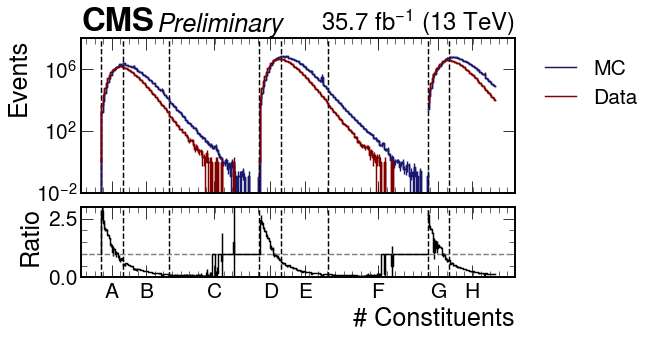

In [37]:
x = 'ABCDEFGH'
y = 'ADGBEHCF'
#plot_label = 'SUEP_S1_Cluster'
plot_label = 'SUEP_nconst_Cluster'
output_label = 'Oct02allbg_HTJECcut'
file_ext='.pdf'
for year in ['2017']:
    fig, (ax1, ax2) = plot_ratio_regions(plots, 'A_'+plot_label, 
                           'MC_'+year, 'data_'+year, 
                           x, density=False)
    ax1.legend(labels=['MC', 'Data'], loc='upper left', bbox_to_anchor=(1.02, 1))
    hep.cms.label(llabel='Preliminary', data=False, lumi=lumiLabel(year,scouting=1), ax=ax1)

    ax1.set_ylim(1e-2, 1e8)
    ax2.set_ylim(0, 3)

    #if saveToAN: plt.savefig(AN_label.format("control_regions_ratio_" + year), bbox_inches='tight')
    fig.savefig(output_label + plot_label + 'control_regions_ratio_' + year + file_ext, bbox_inches='tight')

### Signal Region 

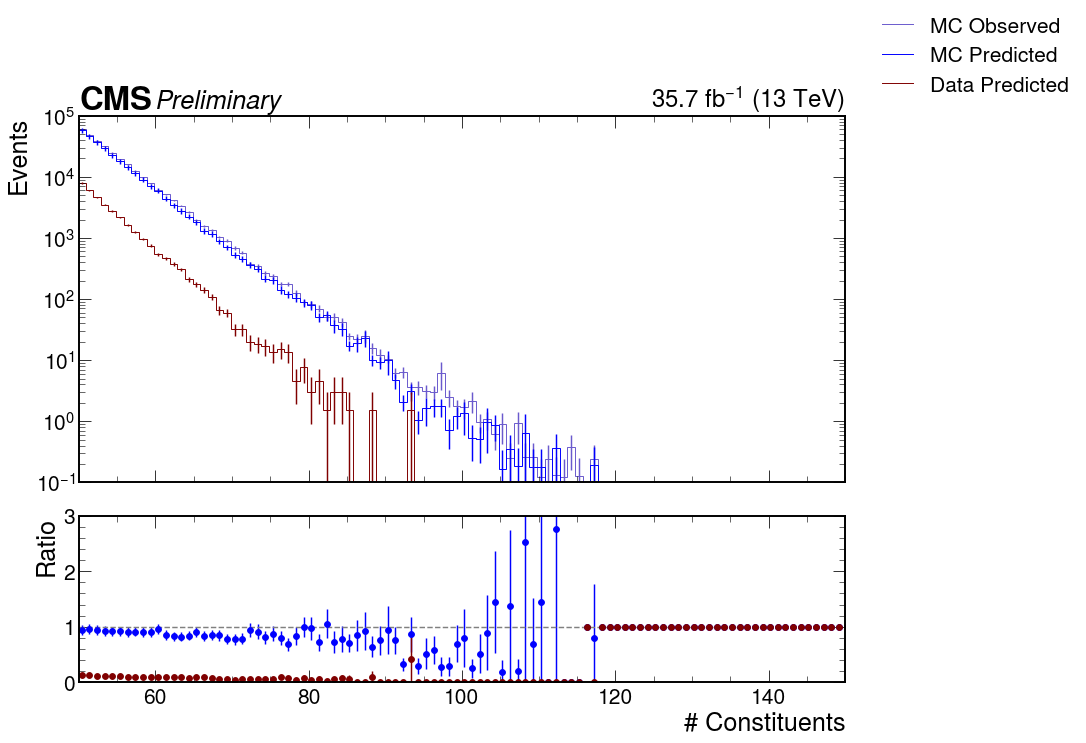

In [38]:
plot_label = '2D_SUEP_S1_vs_SUEP_nconst_Cluster'
year = '2017'
output_label = 'Oct31'
abcdBkg = plots['QCD_HT_'+year][plot_label] + plots['TTJets_'+year][plot_label]
masses = [125, 400, 1000]
xregions = [0.3j, 0.34j, 0.5j, 1.0j]
yregions = [0j, 18j, 50j, 500j]
file_ext='.pdf'
SR, SR_exp = ABCD_9regions_errorProp(abcdBkg, xregions, yregions, sum_var='x')
_, SR_exp_data = ABCD_9regions_errorProp(plots['data_'+year][plot_label], xregions, yregions, sum_var='x')

hlist = [SR, SR_exp, SR_exp_data]
colors = [getColor('QCD_HT'), 'blue', getColor('data')]
labels = ['MC Observed', 'MC Predicted', 'Data Predicted']
for mass in masses:
    sample = 'mS{}_T3.0_mPhi3.0_generic_{}'.format(mass, year)
    label = r'$m_{S}={'+str(mass)+'}$ GeV'
    if sample not in plots.keys(): continue
    abcd = plots[sample][plot_label]
    SUEP_SR = abcd[0.5j:1.0j:sum, 50j:500j]
    hlist.append(SUEP_SR)
    labels.append(label)
    colors.append(getColor(sample))

fig, axs = plot_ratio(hlist, labels=labels, cmap=colors)
fig.set_size_inches(15, 15, forward=True)
axs[0].set_xlim(50, 150)
axs[0].set_ylim(1e-1, 1e5)
hep.cms.label(llabel='Preliminary', data=False, lumi=lumiLabel(year,scouting=True), ax=axs[0])
axs[0].legend(bbox_to_anchor=(1.02,1))
axs[1].set_ylim(0, 3)

#if saveToAN: plt.savefig(AN_label.format("final_"+year), bbox_inches='tight')
plt.savefig(output_label+"final_"+year+file_ext, bbox_inches='tight')

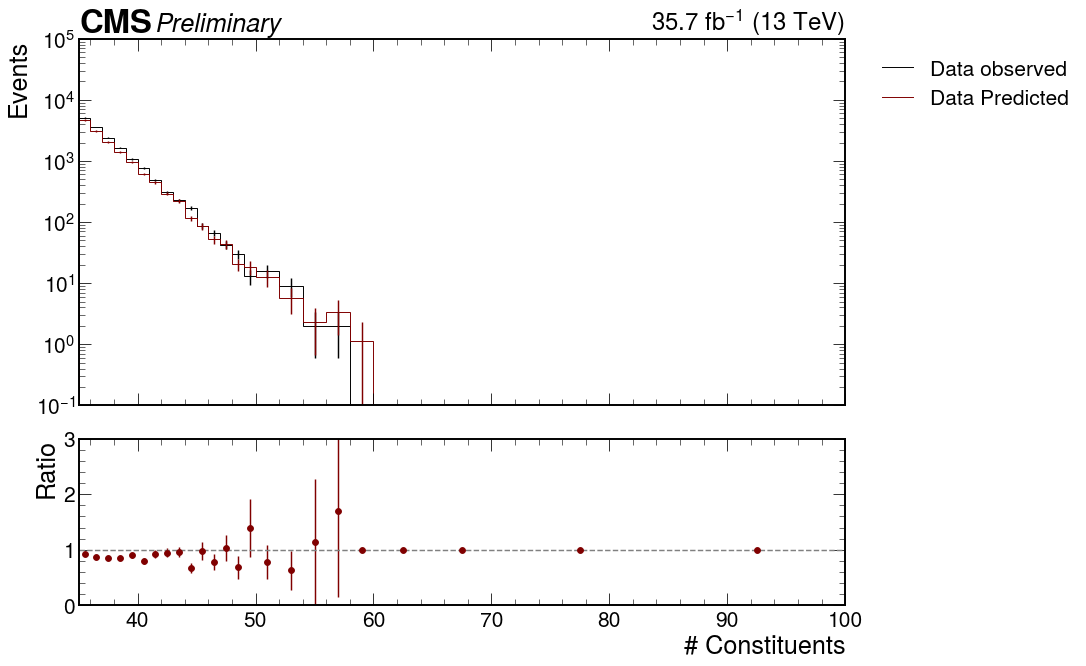

In [39]:
plot_label = '2D_ISR_S1_vs_ISR_nconst_ClusterInverted'
year = '2017'
output_label = 'Oct30'
#abcdBkg = plots['QCD_HT_'+year][plot_label] + plots['TTJets_'+year][plot_label]
masses = [125, 400, 1000]
xregions = [0.3j, 0.34j, 0.5j, 1.0j]
yregions = [0j, 18j, 35j, 500j]
file_ext='.pdf'
#SR, SR_exp = ABCD_9regions_errorProp(abcdBkg, xregions, yregions, sum_var='x')
SR_data, SR_exp_data = ABCD_9regions_errorProp(plots['data_'+year][plot_label], xregions, yregions, sum_var='x')
rebin=True
new_bins=[35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,52,54,56,58,60,65,70,85,100]
#colors = [getColor('QCD_HT'), 'blue','black', getColor('data')]
#labels = ['MC Observed', 'MC Predicted','Data observed', 'Data Predicted']
colors = ['black', getColor('data')]
labels = ['Data observed', 'Data Predicted']
if rebin:
    edges = SR_data.axes[0].edges
    #SR = rebin_piecewise(SR, new_bins)
    #SR_exp = rebin_piecewise(SR_exp, new_bins)
    SR_data = rebin_piecewise(SR_data, new_bins)
    SR_exp_data = rebin_piecewise(SR_exp_data, new_bins)
#hlist = [SR, SR_exp,SR_data, SR_exp_data]
hlist = [SR_data, SR_exp_data]
for mass in masses:
    sample = 'mS{}_T3.0_mPhi3.0_generic_{}'.format(mass, year)
    label = r'$m_{S}={'+str(mass)+'}$ GeV'
    if sample not in plots.keys(): continue
    abcd = plots[sample][plot_label]
    if rebin:
        abcd = rebin_piecewise(abcd, new_bins)
    SUEP_SR = abcd[0.5j:1.0j:sum, 35j:500j]
    hlist.append(SUEP_SR)
    labels.append(label)
    colors.append(getColor(sample))

fig, axs = plot_ratio(hlist, labels=labels, cmap=colors)
fig.set_size_inches(15, 15, forward=True)
axs[0].set_xlim(35, 100)
axs[0].set_ylim(1e-1, 1e5)
hep.cms.label(llabel='Preliminary', data=False, lumi=lumiLabel(year,scouting=True), ax=axs[0])
axs[0].legend(bbox_to_anchor=(1.02,1))
axs[1].set_ylim(0, 3)

#if saveToAN: plt.savefig(AN_label.format("final_"+year), bbox_inches='tight')
plt.savefig(output_label+"final_ISR"+year+file_ext, bbox_inches='tight')

## Ch. 6 Systematics

### ABCD Systematic Table
*Note*: you need to run the cell "ABCD - F/C" before this.

In [41]:
labels = [
    r'& & & $\# Const. \in ( 70, 90]$ & & &\\',
    r'& & & $\# Const. \in ( 90, 110]$ & & &\\',
    r'& & & $\# Const. \in ( 110, 130]$ & & &\\',
    r'& & & $\# Const. \in ( 130, 170]$ & & &\\',
    r'& & & $\# Const. \in ( 170, \inf]$ & & &\\',      
]
yield_syst = ['1.08', '1.08', '1.08']

for i in range(len(systABCD['2017']['values'])):
    line = ''
    if i == 0: line += 'Shape Systematic & Uncorrelated & Correlated & '
    else: line += '& & & '
    line += 'Bin {} & '.format(i)
    for year in systABCD.keys():
        v = systABCD[year]['values'][i]
        if np.isnan(v): 
            v = 2
        v = min(v, 2.0)
        if i == 0: line += 'N/A'
        else: line += str(round(v, 3))
        if year != '2018': line += ' & '
    line += r'\\'
    print(line)
    print(labels[i])

print(r'\hline')

# for i in range(len(table['2018']['values'])):
#     line = ''
#     if i == 0: line += 'Shape Statistical & Uncorrelated  & Uncorrelated & '
#     else: line += '& & & '
#     line += 'Bin {} & '.format(i)
#     for year in table.keys():
#         v, e = table[year]['values'][i], table[year]['errors'][i]
#         if np.isnan(v): 
#             v = 1
#             e = 1
#         if i == 0: line += 'N/A'
#         else: line += str(round(1 + e/v, 3))
#         if year != '2018': line += ' & '
#     line += r'\\'
#     print(line)
#     print(labels[i])

# print(r'\hline')

print("Yield Uncertainty & Uncorrelated & Correlated & All bins & ", ' & '.join(yield_syst), r' \\ ')

Shape Systematic & Uncorrelated & Correlated & Bin 0 & N/A & \\
& & & $\# Const. \in ( 70, 90]$ & & &\\
& & & Bin 1 & 0.779 & \\
& & & $\# Const. \in ( 90, 110]$ & & &\\
& & & Bin 2 & 0.555 & \\
& & & $\# Const. \in ( 110, 130]$ & & &\\
& & & Bin 3 & 0.218 & \\
& & & $\# Const. \in ( 130, 170]$ & & &\\
& & & Bin 4 & -1.856 & \\
& & & $\# Const. \in ( 170, \inf]$ & & &\\
\hline
Yield Uncertainty & Uncorrelated & Correlated & All bins &  1.08 & 1.08 & 1.08  \\ 


### SUEP Systematics Table

In [ ]:
sys_list =  ['puweights', 'track','JER','JES','trigSF','PSWeight_ISR','PSWeight_FSR','prefire','higgs_weights']
mass_list = [125, 400, 1000]
decay = 'generic'
mPhi = '3.0'
T = '3.0'

nconst_bins = [70, 90, 130, 170, 1000]
sph_bins = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]

plt.rcParams.update({'font.size': 13})

upratios, downratios = nested_dict(3, float), nested_dict(3, float)
for year in ['2016', '2017', '2018']:
    for mass in mass_list:

        plot = plots['mS{}_T{}_mPhi{}_{}_{}'.format(mass, T, mPhi, decay, year)]

        for sys in sys_list:

            sig_nconst = plot['SUEP_nconst_Cluster70']
            up_nconst = plot['SUEP_nconst_Cluster70_{}_up'.format(sys)]
            down_nconst = plot['SUEP_nconst_Cluster70_{}_down'.format(sys)]

            sig_sph = plot['SUEP_S1_Cluster70']
            up_sph = plot['SUEP_S1_Cluster70_{}_up'.format(sys)]
            down_sph = plot['SUEP_S1_Cluster70_{}_down'.format(sys)]

            upratio = (up_nconst.sum().value/sig_nconst.sum().value - 1)*100
            upratios[str(mass)][year][sys] = upratio
            #print("Down", down_nconst.sum().value,  np.sqrt(down_nconst.sum().variance))
            downratio = (down_nconst.sum().value/sig_nconst.sum().value - 1)*100
            downratios[str(mass)][year][sys] = downratio

In [ ]:
mass = '1000'

sys_list =  ['puweights', 'track','JER','JES','trigSF','PSWeight_ISR','PSWeight_FSR','prefire','higgs_weights']
correlations = {
    'puweights': "Correlated",
    'track': "Uncorrelated",
    'JER': "Correlated",
    'JES': "Correlated", 
    'trigSF': "Uncorrelated",
    'PSWeight_ISR': "Uncorrelated",
    'PSWeight_FSR': "Uncorrelated",
    'prefire': "Correlated",
    'higgs_weights': "Correlated"
}
labels = {
    'puweights': "Pileup Reweighting",
    'track': "Track Reconstruction",
    'JER': "JER",
    'JES': "JEC", 
    'trigSF': "Trigger Scale Factors",
    'PSWeight_ISR': "Parton Shower Weights - ISR",
    'PSWeight_FSR': "Parton Shower Weights - FSR",
    'prefire': "Prefire Weights",
    'higgs_weights': "Higgs Reweighting"
}
title = r'Systematic & Correlation & \% Effect 2016 & \% Effect in 2017 & \% Effect in 2018\\'
table = [title, r'\hline']
for iRow in range(len(sys_list)):
    
    sys = sys_list[iRow]
    row = labels[sys] + ' & ' + correlations[sys] + ' & '
    years = [2016, 2017, 2018]
    for year in years:
        
        if str(year) in upratios[mass].keys():
            val = max(abs(upratios[mass][str(year)][sys]), abs(downratios[mass][str(year)][sys]))
            val = round(val,2)
        else:
            val = '-'
            
        if year == years[-1]:
            row += str(val) + r' \\'
        else:
            row += str(val) + ' & '
        
    table.append(row)

lumirow = r'Luminosity Uncertainty & Partially & 1.2 & 2.3 & 2.5\\'
table.append(lumirow)

# copy and paste output into latex!
for row in table: print(row)

In [9]:
plots.keys()

dict_keys(['1000to1500_2018', 'QCD_HT_2018', '100to200_2018', '1500to2000_2018', '2000toInf_2018', '200to300_2018', '300to500_2018', '500to700_2018', '700to1000_2018', 'TTJets_2018', 'data_A-v1+RAW_Sep28_HTJECcut.root_2018', 'data_2018', 'data_B-v1+RAW_Sep28_HTJECcut.root_2018', 'data_C-v1+RAW_Sep28_HTJECcut.root_2018', 'data_D-v1+RAW_Sep28_HTJECcut.root_2018', 'data_E-v1+RAW_Sep28_HTJECcut.root_2018', 'mS1000_T4.0_mPhi4.0_hadronic_2018', 'mS125_T4.0_mPhi4.0_generic_2018', 'mS400_T4.0_mPhi4.0_leptonic_2018', 'MC_2018', 'MC_all', 'data_all', 'mS1000_T4.0_mPhi4.0_hadronic_all', 'mS125_T4.0_mPhi4.0_generic_all', 'mS400_T4.0_mPhi4.0_leptonic_all'])

### HT Ratio

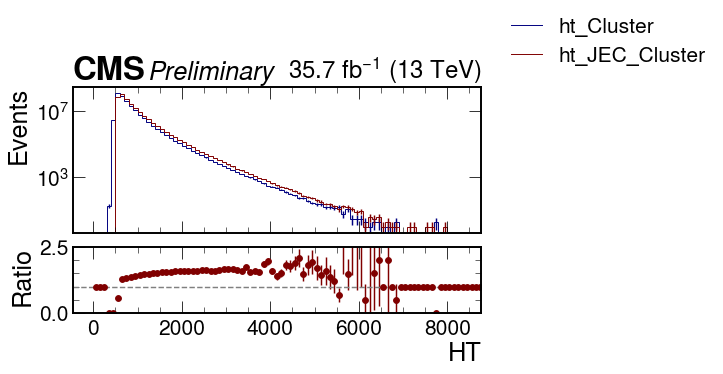

In [42]:
variables = ['ht_Cluster', 'ht_JEC_Cluster']
#             'ht_JEC_JER_up_Cluster', 'ht_JEC_JER_down_Cluster',
#             'ht_JEC_JES_up_Cluster', 'ht_JEC_JES_down_Cluster']
year = '2017'
file_ext = '.pdf'
sample = 'data_'+year
#sample = 'mS1000_T4.0_mPhi4.0_hadronic_'+year
density = False
output_label = "Oct24"
hlist = []
for var in variables:
    h = plots[sample][var]
    if density: h = h/h.sum().value
    hlist.append(h)

fig, axs = plot_ratio(hlist, labels=variables)
hep.cms.label(llabel='Preliminary', data=False, lumi=lumiLabel(year,scouting=True), ax=axs[0])
axs[0].legend(bbox_to_anchor=(1.02,1))
axs[1].set_ylim(0,2.5)

#if saveToAN: fig.savefig(AN_label.format("HT_ratio_"+sample), bbox_inches='tight')
fig.savefig(output_label+"HT_ratio_"+sample+file_ext, bbox_inches='tight')
fig.show()

### Pearson Correlation of ABCD Variables

In [43]:
plot_labels = ['2D_ISR_S1_vs_ISR_nconst_ClusterInverted', '2D_SUEP_S1_vs_SUEP_nconst_Cluster70']
labels = ['ISR', 'SUEP']
#samples = ['data_2016', 'data_2017', 'data_2018']
samples = ['data_2017']

table = []
for plot_label in plot_labels:
    year = []
    for sample in samples:
        h = plots[sample][plot_label]
        h = h[0.3j:, 30j:]
        corr, error = hist2d_correlation(h)
        year.append([corr, error])
    table.append(year)

table = np.array(table)

for i in range(len(table)):
    values = table[i,:,0]
    errors = table[i,:,1]
    line = labels[i] + ' & '
    for v, e in zip(values, errors):
        v, e = sf(v, e)
        line += str(v) + ' $\pm$ ' + str(e) + ' & '
    line = line[:-2]
    line += r'\\'
    print(line)

KeyError: '2D_SUEP_S1_vs_SUEP_nconst_Cluster70'

### Distance Correlation
Warning: this can take quite a while to run.

In [ ]:
import numpy as np
from scipy.spatial import distance_matrix
from scipy.spatial.distance import pdist, squareform

def distance_correlation(x, y):
    
    n = x.shape[0]
    
    x = x.reshape((x.shape[0], 1))
    y = y.reshape((y.shape[0], 1))

    a = squareform(pdist(x, "euclidean"))
    b = squareform(pdist(y, "euclidean"))

    a_row_means = a.mean(axis=0, keepdims=True)
    b_row_means = b.mean(axis=0, keepdims=True)
    a_col_means = a.mean(axis=1, keepdims=True)
    b_col_means = b.mean(axis=1, keepdims=True)
    a_mean = a.mean()
    b_mean = b.mean()

    A = a - a_row_means - a_col_means + a_mean
    B = b - b_row_means - b_col_means + b_mean

    dcov = np.sqrt((A * B).sum() / float(n * n))
    dcov_x = np.sqrt((A * A).sum() / float(n * n))
    dcov_y = np.sqrt((B * B).sum() / float(n * n))
    dcor = dcov / np.sqrt(dcov_x * dcov_y)
    
    return dcor

samples = ['2D_ISR_S1_vs_ISR_nconst_ClusterInverted', '2D_SUEP_S1_vs_SUEP_nconst_Cluster70']
labels = ['ISR', 'SUEP']
years = ['2018', '2017', '2016']

table = []
for sample in samples:
    print(sample)
    sample_table = []
    for year in years:
        print(year)
        trials = []
        npoints = 10000
        for trial in range(100):
            abcd = plots['data_'+year][sample].copy()
            abcd = abcd[0.3j:1.0j, 30j:150j].copy()
            xvals = abcd.axes[0].centers
            yvals = abcd.axes[1].centers
            zvals = abcd.to_numpy()[0]

            xindices = np.random.choice(len(xvals), size=npoints, replace=True)
            yindices = np.random.choice(len(yvals), size=npoints, replace=True)
            probs = np.random.rand(npoints)

            xvals = xvals[xindices]
            yvals = yvals[yindices]
            zvals = zvals[xindices, yindices]
            
            xvals = xvals[zvals > probs]
            yvals = yvals[zvals > probs]
            
            dcor = distance_correlation(xvals, yvals)
            trials.append(dcor)
        
        distCorr = np.mean(trials)
        distCorr_err = np.std(trials)
        sample_table.append([distCorr, distCorr_err])
    table.append(sample_table)

table = np.array(table)

for i in range(len(table)):
    values = table[i,:,0]
    errors = table[i,:,1]
    line = labels[i] + ' & '
    for v, e in zip(values, errors):
        v, e = sf(v, e)
        line += str(v) + ' $\pm$ ' + str(e) + ' & '
    line = line[:-2]
    line += r'\\'
    print(line)

2D_ISR_S1_vs_ISR_nconst_ClusterInverted
2018
2017
2016
2D_SUEP_S1_vs_SUEP_nconst_Cluster70
2018
2017
2016
ISR & 0.139 $\pm$ 0.012 & 0.135 $\pm$ 0.015 & 0.129 $\pm$ 0.014 \\
SUEP & 0.121 $\pm$ 0.008 & 0.119 $\pm$ 0.01 & 0.128 $\pm$ 0.01 \\


### ISR Closure - Yield Systematic

In [44]:
plot_label = '2D_ISR_S1_vs_ISR_nconst_ClusterInverted'
xregions = [0.3j, 0.34j, 0.5j, 1.0j]
yregions = [0j, 18j, 35j, 500j]

table = []
labels = ['SR', 'Predicted SR', 'Ratio']
for year in [ '2017']:
    
    sample = 'data_'+year
    abcd = plots[sample][plot_label].copy()

    SR, SR_exp, delta_SR_exp= ABCD_9regions_yield(abcd, xregions, yregions)

    ratio = SR/SR_exp
    delta_ratio = np.sqrt((SR_exp**-2)*(SR) + (SR**2 * SR_exp**-4)*(delta_SR_exp**2))
    table.append([SR, np.sqrt(SR), SR_exp, delta_SR_exp, ratio, delta_ratio])

table = np.array(table).T

for i in range(len(table)):
    if i%2: continue
    values = table[i]
    errors = table[i+1]
    line = labels[int(i/2)] + ' & '
    for v, e in zip(values, errors):
        v, e = sf(v, e)
        line += str(v) + ' $\pm$ ' + str(e) + ' & '
    line = line[:-2]
    line += r'\\'
    print(line)

SR & 16060.0 $\pm$ 130.0 \\
Predicted SR & 14100.0 $\pm$ 400.0 \\
Ratio & 1.137 $\pm$ 0.031 \\


## Ch. 7 Results

### Validation Region Contamination Table

In [45]:
# validation region
plot_label = 'SUEP_nconst_Cluster70'

regions = 'I'

ratios, lines = [], []
for year in ['2017']:
    QCD_sample = 'data_'+year
    for sample in [x for x in plots.keys() if 'mS' in x]:
        t = sample[sample.find('_T')+2:sample.find('_mPhi')]
        mPhi = sample[sample.find('_mPhi')+5:sample.find('_generic')]
        mS = sample[sample.find('_mS')+3:sample.find('_T')]
        
        label = '$T = '+str(t)+' \GeV$, $m_{\phi}= '+str(mPhi)+'\GeV$, $m_S = ' + str(mS) + ' \GeV$'
        
        line = label + ' & '
        for i, region in enumerate(regions):
            h = plots[sample][region + "_" + plot_label][70j:90j]
            hQCD = plots[QCD_sample][region + "_" + plot_label][70j:90j]
            alpha = h.sum().value
            beta = hQCD.sum().value
            total = alpha/beta * 100
            
            ratios.append(total)
            
            err = np.sqrt(alpha * (beta**-2) + (alpha**2) * (beta**-3)) * 100
            line += '$' + str(round(total,2)) + '\\pm' + str(round(err,2)) + '$'

            if i == len(regions)-1: line += ' \\\\'
            else: line += ' & '
        # print(line)
        lines.append(line)
    print()
    
sorted_lines = np.array(lines)[np.argsort(ratios)]

for l in sorted_lines[-10:]:
    print(l)
    
print(np.mean(ratios))


nan


### Validation Region Yields

In [46]:
plot_label = '2D_SUEP_S1_vs_SUEP_nconst_Cluster70'
xregions = [0.3j, 0.4j, 0.5j, 1.0j]
yregions = [30j, 50j, 70j, 500j]

table = []
labels = ['SR', 'Predicted SR', 'Ratio']
#for year in ['2016', '2017', '2018']:
for year in ['2017']:
    
    sample = 'data_'+year
    abcd = plots[sample][plot_label].copy()

    SR, SR_exp, delta_SR_exp = ABCD_9regions_yield(abcd, xregions, yregions)

    ratio = SR/SR_exp
    delta_ratio_stat = np.sqrt((SR_exp**-2)*(SR) + (SR**2 * SR_exp**-4)*(delta_SR_exp**2))
    delta_ratio_syst = 0.08
    table.append([SR, np.sqrt(SR), None, SR_exp, delta_SR_exp, None, ratio, delta_ratio_stat, delta_ratio_syst])

table = np.array(table).T

for i in range(len(table)):
    if i%3!=0: continue
    values = table[i]
    errors_stat = table[i+1]
    errors_syst = table[i+2]
    line = labels[int(i/3)] + ' & '
    for v, stat, syst in zip(values, errors_stat, errors_syst):
        if syst is not None:
            v = round(v, 2)
            stat = round(stat, 2)
            syst = round(syst, 2)
            line += str(v) + ' $\pm$ ' + str(stat) + ' (stat.) $\pm$ ' + str(syst) + ' (syst.) & '
        else:
            v, stat = sf(v, stat)
            line += str(v) + ' $\pm$ ' + str(stat) + ' & '
    line = line[:-2]
    line += r'\\'
    print(line)

KeyError: '2D_SUEP_S1_vs_SUEP_nconst_Cluster70'

### Table and Plots of Post-Fits, Limits
See SUEPLimits repo

The following is DEPRECATED

In [47]:
plot_label = '2D_SUEP_S1_vs_SUEP_nconst_Cluster70'
year = '2017'
abcd = plots['QCD_HT_'+year][plot_label]

newbins = [70, 90, 110, 130, 170, 500]
xregions = [0.3j, 0.4j, 0.5j, 1.0j]
yregions = [30j, 50j, 70j, 500j]
SR, SR_exp = ABCD_9regions_errorProp(abcd, xregions, yregions, sum_var='x')
SR_data, SR_exp_data = ABCD_9regions_errorProp(plots['data_'+year][plot_label], xregions, yregions, sum_var='x')

fig, ax = plt.subplots()
hep.cms.label(llabel='Preliminary',data=False, lumi=lumiLabel(year))
hep.histplot(rebin_piecewise(SR_exp_data, newbins), yerr=True, label="Pred. SR - Data", color=default_colors['data'])    
hep.histplot(rebin_piecewise(SR, newbins), lw=3, histtype='fill', alpha=0.3,yerr=True, label="SR - MC", color=default_colors['QCD'])    
hep.histplot(rebin_piecewise(SR_exp, newbins), lw=3, yerr=True, label="Pred. SR - MC", color=default_colors['QCD'], linestyle='dashed')    
hep.histplot(rebin_piecewise(SR_data, newbins), lw=3, yerr=True, label="SR - Data", color=default_colors['data'], linestyle='dashed')    

# samples = ['SUEP-m125-generic-htcut_'+year, 'SUEP-m400-generic_'+year,
#           'SUEP-m750-generic_'+year, 'SUEP-m1000-generic_'+year]
# labels = [r'$M_{S}=125$ GeV',r'$M_{S}=400$ GeV',r'$M_{S}=750$ GeV',r'$M_{S}=1000$ GeV']
masses = [125, 400, 700, 1000]
for mass in masses:
    sample = 'mS{}_T3.0_mPhi3.0_generic_{}'.format(mass, year)
    label = r'$m_{S}='+str(mass)+'$ GeV'
    if sample not in plots.keys(): continue
    abcd = plots[sample][plot_label]
    SUEP_SR = abcd[xregions[-2]:1.0j:sum, yregions[-2]:500j]
    hep.histplot(rebin_piecewise(SUEP_SR, newbins), yerr=True, label=label)    

plt.legend(loc='upper left', bbox_to_anchor=(1.02, 1))
plt.yscale("log")
plt.ylim(1e0, 1e6)

KeyError: '2D_SUEP_S1_vs_SUEP_nconst_Cluster70'

## Appendix B

In [ ]:
plot_label = '2D_SUEP_S1_vs_SUEP_nconst_Cluster70'
year = '2018'
samples = [x for x in plots.keys() if 'mS' in x] + ['QCD_HT_'+year]
#samples =['QCD_HT_'+year]

draw_lines = True
lines_x = [0.3, 0.4, 0.5]
lines_y = [30, 50, 70]

fig, ax = plt.subplots(figsize=(10, 10))

decays = {
    'hadronic' : r"$A^' \rightarrow e^{+}e^{-},\mu^{+}\mu^{-},\pi^{+}\pi^{-}$""\n""with BR=15,15,70%",
    'leptonic' : r"$A^' \rightarrow e^{+}e^{-},\mu^{+}\mu^{-},\pi^{+}\pi^{-}$""\n""with BR=40,40,20%",
    'generic' : r"$A^' \rightarrow \pi^{+}\pi^{-}$""\n""with BR=100%"
}
    
for i, sample in enumerate(samples):
    h = plots[sample][plot_label]
    
    print(sample)
    
    bins = np.linspace(0,500,10)
    h = h[0.3j:,30j::2j]

    hep.cms.label(llabel='Preliminary',data=False, lumi=lumiLabel(year))
    _ = hep.hist2dplot(h, 
               norm=matplotlib.colors.LogNorm(),
               cmap = 'PuBu',
               cbar=True,
               label=sample) 

    # draw lines to visualize ABCD regions
    if draw_lines:
        for y in lines_y: plt.plot([0,10000], [y,y], color='red', linestyle='dashed')
        for x in lines_x: plt.plot([x,x], [0,1000], color='red', linestyle='dashed')

    plt.ylim(10,200)
    plt.xlim(0.2,1.0)
    
    if 'mS' in sample:
        plt.ylim(10,500)
        split = sample.split('_')
        (Mass,t,mdark,decay) = (float(split[0][2:]),float(split[1][1:]),float(split[2][4:]),split[3])

        plt.text(0.25, 366,r"$m_S$ = {}".format(Mass), fontsize='small')
        plt.text(0.25, 333,r"$m_\phi$ = {}".format(mdark), fontsize='small')
        plt.text(0.25, 300,"T = {}".format(t), fontsize='small')
        plt.text(0.25, 250,"decay = {}".format(decays[decay]), fontsize='small')

    if saveToAN: plt.savefig(AN_label.format("{}_{}_{}".format(plot_label, sample, year)))
    plt.savefig(output_label+plot_label+"_"+sample+"_"+year+file_ext)
    plt.show()

## Appendix E

### ML 2D Distributions of ABCD Variables

In [ ]:
plot_label = '2D_SUEP_S1_vs_single_l5_bPfcand_S1_SUEPtracks_GNN'
sample = 'QCD_HT_2018'
#samples += ['SUEP-m125-generic', 'SUEP-m400-generic', 'SUEP-m750-generic', 'SUEP-m1000-generic']
draw_lines = True
lines_x = [0.3,0.4, 0.5, 1.0]
lines_y = [0,0.5,1]

fig, ax = plt.subplots(figsize=(10, 10))

k = 0
regions = ['A','B','C','D','E','SR']
for i in range(len(lines_y)-1):
    for j in range(len(lines_x)-1):
        xloc = (lines_x[j+1] + lines_x[j])/2 - 0.01
        yloc = (lines_y[i+1] + lines_y[i])/2
        plt.text(xloc, yloc, regions[k])
        k+=1
    
if plots[sample][plot_label].sum().value == 0:
    print("Histogram empty for sample", sample)

h = plots[sample][plot_label]
h = h[0.3j:,:]

hep.cms.label(llabel='Preliminary',data=False, lumi=61.0)
_ = hep.hist2dplot(h, 
           norm=matplotlib.colors.LogNorm(),
           cmap = 'PuBu',
           cbar=True,
           label=sample) 

# draw lines to visualize ABCD regions
if draw_lines:
    for y in lines_y: plt.plot([0,10000], [y,y], color='red', linestyle='dashed')
    for x in lines_x: plt.plot([x,x], [0,1000], color='red', linestyle='dashed')

plt.ylim(0,1)
plt.xlim(0.2,1.0)

if saveToAN: plt.savefig(AN_label.format("ML_extendedABCD_regions_2018"))
plt.savefig(output_label+""+file_ext)
plt.show()

### ML Closure

In [ ]:
plot_label = '2D_SUEP_S1_vs_single_l5_bPfcand_S1_SUEPtracks_GNN'
year = '2018'
abcd = plots['QCD_HT_'+year][plot_label]

xregions = [0.3j, 0.4j, 0.5j, 1.0j]
yregions = [0.0j, 0.5j, 1.0j]

SR, SR_exp = ABCD_6regions(abcd, xregions, yregions, sum_var='x')

SR = SR[::2j]
SR_exp = SR_exp[::2j]

fig, axs = plot_ratio([SR_exp, SR], labels=["$SR_{obs}$", "$SR_{exp}$"])
_ = axs[1].set_ylim(0,2)
_ = axs[0].legend()
hep.cms.label(llabel='Preliminary', data=False, lumi=lumiLabel(year), ax=axs[0])


if saveToAN: plt.savefig(AN_label.format("ML_closure_"+year))
plt.savefig(output_label+"ML_closure_"+year+file_ext)

### ML MC/Data

In [ ]:
x = 'ABCDE'
y = 'ABCDE'
year = '2018'
plot_labels = ['single_l5_bPfcand_S1_SUEPtracks_GNN']
for plot_label in plot_labels:
    fig, (ax1, ax2) = plot_ratio_regions(plots, 'A_'+plot_label, 
                           'data_'+year, 'QCD_HT_'+year,
                           y, density=False)
    ax1.legend(labels=['QCD','Data'], loc='upper left', bbox_to_anchor=(1.02, 1))
    hep.cms.label(llabel='Preliminary', data=False, lumi=lumiLabel(year), ax=ax1)

    ax1.set_ylim(1e0, 2e5)
    fig.set_size_inches(15, 6)
    
    if saveToAN: fig.savefig(AN_label.format("ML_control_regions_ratio_" + year))
    fig.savefig(output_label + 'ML_control_regions_ratio_' + year + file_ext, bbox_inches='tight')

### ML Signal Region

In [ ]:
plot_label = '2D_SUEP_S1_vs_single_l5_bPfcand_S1_SUEPtracks_GNN'
year = '2018'
abcd = plots['QCD_HT_'+year][plot_label]

xregions = [0.3j, 0.4j, 0.5j, 1.0j]
yregions = [0.0j, 0.5j, 1.0j]

SR, SR_exp = ABCD_6regions(abcd, xregions, yregions, sum_var='x')
_, SR_exp_data = ABCD_6regions(plots['data_'+year][plot_label], xregions, yregions, sum_var='x')

# use the custom plot_ratio
# the hist implementation used elsewhere in the notebook doesn't use the 
# errors in the hists' bins to calculate the errors in the ratio plot
# fig, axs, _ = plot_ratio(SR_exp, SR, 
#                          "# Constituents in SUEP", "$SR_{obs}$ - QCD", "$SR_{exp}$ - Data")
# _ = axs[1].set_ylim(0,3.0)
# _ = axs[0].legend()

fig, ax = plt.subplots(figsize=(10, 10))
hep.cms.label(llabel='Preliminary',data=False, lumi=lumiLabel(year))
hep.histplot(SR_exp_data, yerr=False, label="Pred. SR - Data", color=default_colors['data'])    
hep.histplot(SR, yerr=False, label="SR - QCD", color=default_colors['QCD'])    
hep.histplot(SR_exp, yerr=False, label="Pred. SR - QCD", color=default_colors['QCD'])    

samples = ['SUEP-m125-generic-htcut', 'SUEP-m400-generic',
          'SUEP-m750-generic', 'SUEP-m1000-generic']
labels = [r'$M_{S}=125$ GeV',r'$M_{S}=400$ GeV',r'$M_{S}=750$ GeV',r'$M_{S}=1000$ GeV']
for sample, label in zip(samples, labels):
    abcd = plots[sample][plot_label]
    SUEP_SR = abcd[0.5j:1.0j:sum,0.5j:1.0j:2j]
    hep.histplot(SUEP_SR, yerr=False, label=label, color=default_colors[sample])    

plt.legend(loc='best')
plt.yscale("log")
plt.ylim(1e0,1e5)

if saveToAN: plt.savefig(AN_label.format("ML_final_"+year))
plt.savefig(output_label+"ML_final_"+year+file_ext)

### ML Systematic

In [ ]:
# parameters
plot_label = '2D_ISR_S1_vs_single_l5_bPfcand_S1_SUEPtracks_GNNInverted'
sample1 = 'QCD_HT_2018'
sample2 = 'data_2018'

h1 = plots[sample1][plot_label]
h2 = plots[sample2][plot_label]

h1 = h1[0.0j::sum, 0.0j::5j]
h2 = h2[0.0j::sum, 0.0j::5j]

fig = plt.figure(figsize=(10, 8))
      
fig, axs, _ = plot_ratio([h1, h2] labels=[r'QCD - $H_T$ Binned', 'Data'])
axs[0].legend()
axs[1].set_ylim(0.5,2.5)
#axs[0].set_yscale("linear")
cms = axs[0].text(
    -0.25, 4.5e7, u"CMS $\it{Preliminary}$",
    fontsize=24, fontweight='bold',
)
lumi = axs[0].text(
    0.78, 4.5e7, r"%.1f fb$^{-1}$ (13 TeV)" % round(lumis[year]/1000,1),
    fontsize=22, 
)
plt.savefig(AN_label.format("ML_systematic_"+year))

In [14]:
plots.keys()

dict_keys(['1000to1500_2018', 'QCD_HT_2018', '100to200_2018', '1500to2000_2018', '2000toInf_2018', '200to300_2018', '300to500_2018', '500to700_2018', '700to1000_2018', 'TTJets_2018', 'data_A-v1+RAW_Sep28_HTJECcut.root_2018', 'data_2018', 'data_B-v1+RAW_Sep28_HTJECcut.root_2018', 'data_C-v1+RAW_Sep28_HTJECcut.root_2018', 'data_D-v1+RAW_Sep28_HTJECcut.root_2018', 'data_E-v1+RAW_Sep28_HTJECcut.root_2018', 'mS1000_T4.0_mPhi4.0_hadronic_2018', 'mS125_T4.0_mPhi4.0_generic_2018', 'mS400_T4.0_mPhi4.0_leptonic_2018', 'MC_2018', 'MC_all', 'data_all', 'mS1000_T4.0_mPhi4.0_hadronic_all', 'mS125_T4.0_mPhi4.0_generic_all', 'mS400_T4.0_mPhi4.0_leptonic_all'])

## Appendix I

In [48]:
sys_list =  ['puweights', 'track','JER','JES','trigSF','PSWeight_ISR','PSWeight_FSR','prefire','higgs_weights']
#sys_list =  ['track']
mass_list = [125]
#mass_list = [400]
#mass_list = [1000]

decay = 'generic'
year = '2016apv'
mPhi = '4.0'
T = '4.0'
output_label="Nov9"
nconst_bins = [0,10,20,30,40,50,60,70,80,90,100]
sph_bins = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]

plt.rcParams.update({'font.size': 13})

upratios, downratios = nested_dict(3, float), nested_dict(3, float)
for mass in mass_list:
    
    plot = plots['mS{}_T{}_mPhi{}_{}_{}'.format(mass, T, mPhi, decay, year)]

    for sys in sys_list:

        sig_nconst = plot['SUEP_nconst_Cluster']
        up_nconst = plot['SUEP_nconst_Cluster_{}_up'.format(sys)]
        down_nconst = plot['SUEP_nconst_Cluster_{}_down'.format(sys)]

        sig_sph = plot['SUEP_S1_Cluster']
        up_sph = plot['SUEP_S1_Cluster_{}_up'.format(sys)]
        down_sph = plot['SUEP_S1_Cluster_{}_down'.format(sys)]
        
        print(sys)
        print(mass, mPhi, T, decay)
        upratio = (up_nconst.sum().value/sig_nconst.sum().value - 1)*100
        print("\tUp Ratio", upratio)
        upratios[str(mass)][year][sys] = upratio
        #print("Down", down_nconst.sum().value,  np.sqrt(down_nconst.sum().variance))
        downratio = (down_nconst.sum().value/sig_nconst.sum().value - 1)*100
        print("\tDown Ratio", downratio)
        downratios[str(mass)][year][sys] = downratio

        # Change the bin sizes

        sig_nconst = rebin_piecewise(sig_nconst, nconst_bins)
        up_nconst = rebin_piecewise(up_nconst, nconst_bins)
        down_nconst = rebin_piecewise(down_nconst, nconst_bins)

        sig_sph = rebin_piecewise(sig_sph, sph_bins)
        up_sph = rebin_piecewise(up_sph, sph_bins)
        down_sph = rebin_piecewise(down_sph, sph_bins)

        plt.figure(figsize=(16,8))
        plt.gcf().subplots_adjust(bottom=0.15, left=0.17)


        ### Plot distribution for number of constituents

        # Plot histograms of systematics 
        up,down,sig = up_sph,down_sph,sig_sph
        ax1 = plt.subplot2grid((4,2), (0,0),rowspan=2)
        ax1.bar(*up.axes.centers, up.values(), width=up.axes.widths[0],yerr=up.variances()**0.5,fill=False,color= 'salmon',edgecolor='red',linewidth=2,alpha =0.7,label='Up',capsize=4,ecolor = 'salmon')
        ax1.bar(*sig.axes.centers, sig.values(), width=sig.axes.widths[0], yerr=sig.variances()**0.5,fill=False,linewidth=2,color= 'grey',edgecolor='black',alpha=0.7, label='Signal',capsize=4, ecolor='black')
        ax1.bar(*down.axes.centers, down.values(), width=down.axes.widths[0],yerr=down.variances()**0.5,color= 'lightblue',fill=False,edgecolor='blue',alpha=0.7,linewidth=2,label='Down',capsize=4,ecolor='blue')
        ax1.set_title("Effect "+sys+ " systematic for $m_{S}=$"+str(mass)+ " GeV")
        ax1.set_ylim([0.5,max(sig.values())*10])
        ax1.set_ylabel("Events")
        ax1.set_yscale('log')
        ax1.legend() 


        # Make ratio plot
        up_ratio = np.divide( up.values(), sig.values(), out=np.ones_like(up.values()), where=sig.values()!=0) #Overestimate
        down_ratio = np.divide( down.values(), sig.values(), out=np.ones_like(down.values()), where=sig.values()!=0) #Underestimate

        #Calculate errors in up_ratio and down_ratio
        up_err = hist.intervals.ratio_uncertainty(up.values(),sig.values()) #This ratio uncertainty is the poisson interval (for a coverage of 0.68) divided by sig
        down_err = hist.intervals.ratio_uncertainty(down.values(),sig.values())

        ax2 = plt.subplot2grid((4,2), (2,0),sharex=ax1)
        ups = ax2.errorbar(*sig.axes.centers, up_ratio,fmt='o', color='red', label = 'up',yerr= up_err,capsize=4)
        downs = ax2.errorbar(*sig.axes.centers, down_ratio,fmt='o', color='blue', label = 'down',yerr= down_err,capsize=4)
        ax2.axhline(1,ls='--')
        ax2.set_ylim([0.5,2.0])
        ax2.set_xlabel('$Sph_1$')
        ax2.set_ylabel('sys/nom')


        ### Plot distribution for number of sphericity

        # Plot histograms of systematics 
        up,down,sig = up_nconst,down_nconst,sig_nconst
        ax3 = plt.subplot2grid((4,2), (0,1),rowspan=2)
        ax3.bar(*up.axes.centers, up.values(), width=up.axes.widths[0],yerr=up.variances()**0.5,fill=False,color= 'salmon',edgecolor='red',linewidth=2,alpha =0.7,label='Up',capsize=4,ecolor = 'salmon')
        ax3.bar(*sig.axes.centers, sig.values(), width=sig.axes.widths[0], yerr=sig.variances()**0.5,fill=False,linewidth=2,color= 'grey',edgecolor='black',alpha=0.7, label='Signal',capsize=4, ecolor='black')
        ax3.bar(*down.axes.centers, down.values(), width=down.axes.widths[0],yerr=down.variances()**0.5,color= 'lightblue',fill=False,edgecolor='blue',alpha=0.7,linewidth=2,label='Down',capsize=4,ecolor='blue')
        ax3.set_title("Effect "+sys+ " systematic for $m_{S}=$"+str(mass) +" GeV")
        ax3.set_ylim([0.5,max(sig.values())*10])
        ax3.set_ylabel("Events")
        ax3.set_yscale('log')
        ax3.legend()


        # Make ratio plot
        up_ratio = np.divide( up.values(), sig.values(), out=np.ones_like(up.values()), where=sig.values()!=0) #Overestimate
        down_ratio = np.divide( down.values(), sig.values(), out=np.ones_like(down.values()), where=sig.values()!=0) #Underestimate

        #Calculate errors in up_ratio and down_ratio
        up_err = hist.intervals.ratio_uncertainty(up.values(),sig.values()) #This ratio uncertainty is the poisson interval (for a coverage of 0.68) divided by sig
        down_err = hist.intervals.ratio_uncertainty(down.values(),sig.values())

        ax4 = plt.subplot2grid((4,2), (2,1),sharex=ax3)
        ups = ax4.errorbar(*sig.axes.centers, up_ratio,fmt='o', color='red', label = 'up',yerr= up_err,capsize=4)
        downs = ax4.errorbar(*sig.axes.centers, down_ratio,fmt='o', color='blue', label = 'down',yerr= down_err,capsize=4)
        ax4.axhline(1,ls='--')
        ax4.set_ylim([0.5,2.0])
        ax4.set_xlabel("$\# Constituents$")
        ax4.set_ylabel('sys/nom')
        
        # if saveToAN: plt.savefig(AN_label.format('systematic_variations_' + sys +'_mS' + str(mass)),bbox_inches='tight')
        
        plt.savefig(output_label + 'systematic_variations_' + sys +'_mS' + str(mass), bbox_inches='tight')
        plt.show()

KeyError: 'mS125_T4.0_mPhi4.0_generic_2016apv'